# IDS Assignment Part 2 - <font color="red"><h7>Deadline: 23/01/2023 23:59</h7></font>
This is the second part of the assignment in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing your screenshots for Question 7. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Natalia Melo Fernández (no. 449853)
    
    2. Lucía Ceña Alvo (no. 449125)
    
    3. Miguel Manzano Rodríguez (no. 447498)

## Question 1: Preprocessing (20 points)

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
print(doc2vec._version_)
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk.lm import MLE
from nltk.util import ngrams

In this question, we consider a dataset documenting the Ski Resorts in Europe (**ski_resorts.csv**).
Each row contains some information about the Ski resort.
You can find a short description for each column:

| Column | Description |
| ------ | ----------- |
| Resort | The name of the ski & snowboard resort. |
| Country | The country in which the resort is located. |
| HighestPoint | The highest mountain point at the ski resort.   |
| LowestPoint | The lowest possible point to ski at the ski resort.  |
| DayPassPriceAdult | The price shows what it costs for 1 adult for 1 day in the main season in Euro. |
| BeginnerSlope | The total amount of “beginner” slopes in kilometer at the resort. “Beginner slopes” contains “children”, “blue” and, “green” slopes. |
| IntermediateSlope | The total amount of “intermediate” slopes in kilometer at the resort. “Intermediate slopes” contains “red” slopes. |
| DifficultSlope | The total amount of “difficult” slopes in kilometer at the resort. “Difficult slopes” contains “black”, “advanced”, and ”expert” slopes. |
| TotalSlope | The sum of “beginner slopes” + “intermediate slopes” + “difficult slopes” |
| Snowparks | Does the resort have one or more snowparks, or not? |
| NightSki | Does the resort offer skiing on illuminated slopes? |
| SurfaceLifts | The amount of lifts in this category: T-bar, Sunkidslift, Rope lifts, and people mower. |
| ChairLifts | The total amount of chairlifts. |
| GondolaLifts | The amount of lifts in this category: Gondola, Train lifts, Funicular, Combined gondola and chairlifts, Helicopter lifts, Snowcats, and Aerial tramways. |
| TotalLifts | The sum of “surface lifts etc” + “gondola etc” + “chairlifts etc.” |
| LiftCapacity | How many passengers can the lift system at the ski resort mowe in one hour? |
| SnowCannons  |The total amount of snow cannons at the ski resort.|

### a) Loading the Data and Initial Quality Investigation (2.5pts)

#### **a(i)** 
Load the dataset into a dataframe `df`. <font color='red'>Use the first column as index for your dataframe</font>. Ensure that the index is valid, that is, it should not contain any duplicate entries. 



**In the subsequent questions, only modify the dataframe `df` if explicitly requested. However, you can always create working copies.**

In [2]:
df = pd.read_csv('ski_resorts.csv')

# Rename first column to index.
df.columns.values[0] = "index"

# Remove rows with duplicated indexes
df.drop_duplicates(subset=['index'],inplace=True)

# Set first column as index
df.set_index('index', inplace=True)

#### **a(ii)** 
Show the data types of the dataframe columns as well as the first 5 rows. On the first sight, are there any data type problems (e.g., numerical columns having a non-numerical data type)?



In [3]:
# Print Data types of the Dataframe Columns
print(df.dtypes)

# Print first 5 rows
display(df.head(5))

Resort                object
Country               object
HighestPoint         float64
LowestPoint          float64
DayPassPriceAdult    float64
BeginnerSlope        float64
IntermediateSlope      int64
DifficultSlope       float64
TotalSlope             int64
Snowparks             object
NightSki              object
SurfaceLifts         float64
ChairLifts             int64
GondolaLifts         float64
TotalLifts             int64
LiftCapacity         float64
SnowCannons          float64
dtype: object


Resort          Country  \
index                                                                       
1                                  Alpendorf (Ski amedé)          Austria   
2      Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...          Andorra   
3                                  Oberau (Wildschönau)          Austria   
4                                         Dachstein West          Austria   
5                                            Rosa Khutor  Southern Russia   

       HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  \
index                                                                
1            1980.0        740.0               52.0           30.0   
2            2640.0       1710.0               47.0          100.0   
3            1130.0        900.0               30.0            1.0   
4            1620.0        780.0               42.0           15.0   
5            2320.0        940.0               22.0           30.0   

       IntermediateSlope  DifficultSlope  TotalSlope Snowparks NightSki  \
index                                                                     
1                     81             4.0         115       Yes       No   
2                     77            33.0         210       Yes      Yes   
3                      0             1.0           2        No       No   
4                     33             3.0          51       Yes      Yes   
5                     26            21.0          77       Yes       No   

       SurfaceLifts  ChairLifts  GondolaLifts  TotalLifts  LiftCapacity  \
index                                                                     
1              22.0          16          11.0          49       75398.0   
2              37.0          28           7.0          72       99017.0   
3               2.0           0           0.0           2        1932.0   
4              25.0           8           3.0          36       32938.0   
5               6.0          11          10.0          27       49228.0   

       SnowCannons  
index               
1            600.0  
2           1032.0  
3              0.0  
4            163.0  
5            450.0

**Your Answer:**

It seems like there is not a criteria to stablish integrer or float data.
The four slope categories "BeginnerSlop", "IntermediateSlop", "DiffcultSlope" and "TotalSlope" all contain the same type of information (a slope angle). However, some are stored as int64 and others as float64.

Features such as "SurfaceLifts", "ChairLifts", "SnowCannons", "LiftCapacity" and "GondolaLifts", all measure discrete numerical data (as it corresponds to the number of occurances of an object). Therefore int64 values should be used instead. 

The features 'Snowparks' and 'NightSki' could be transformed into booleans.



#### **a(iii)** 
To improve performance and memory usage (in particular for large datasets) it is important to use **categorical** columns whenever suitable.
Are there any categorical column candidates? Explain your answer. \
Afterward, convert the column(s) in `df` into categorical column(s).

In [4]:
#Country,
df['Country'] = df['Country'].astype('category')
df['Snowparks'] = df['Snowparks'].map({'Yes':True ,'No':False})
df['NightSki'] = df['NightSki'].map({'Yes':True ,'No':False})
print(df.dtypes)

Resort                 object
Country              category
HighestPoint          float64
LowestPoint           float64
DayPassPriceAdult     float64
BeginnerSlope         float64
IntermediateSlope       int64
DifficultSlope        float64
TotalSlope              int64
Snowparks                bool
NightSki                 bool
SurfaceLifts          float64
ChairLifts              int64
GondolaLifts          float64
TotalLifts              int64
LiftCapacity          float64
SnowCannons           float64
dtype: object


**Your Answer:**

We think only 'Country' is suitable to be converted into categorical data, because the 'Resort' column has a unique category for each instance (is an indexing feature) eventhough it is a categorical feature.  We have also converted Yes/No columns into booleans.

### b) Handling Missing Values & Encoding (17.5pts)

In the following task, you can assume that every NAN entry in the dataframe is actually a missing value. This can partially be justified by the fact that pandas did not have problems inferring the "proper" datatypes (e.g., a string indicating a missing number in a number column would result in pandas parsing an object column) and your subsequent check of the data types. Therefore, you can use `df.isna()` as a proxy indicator for missing values.

#### **b(i)** 
Simply discarding missing entries is usually not a good idea. Therefore, you should first analyze the number of missing values and check for patterns of missing values. 

To this end, compute the following statistics on missing values:
1. How many entries does the dataframe have? (To relate this to the number of entries missing)
2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?
3. How many rows have at least a single missing value?
4. Count the number of missing values per column.
5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.
6. What do you observe? Are there any rows containing missing values for the same set of columns? Can you identify potential patterns?


In [5]:
print('Number of entries: ' + str(df.size))

Number of entries: 6392


In [6]:
print('#Missing values: ' + str(df.isna().sum().sum()))
print('Ratio: ' + str(round(df.isna().sum().sum()/df.size*100,2)) + '%')

#Missing values: 87
Ratio: 1.36%


In [7]:
print('#Rows with missing values: ' + str((df.isna().sum(axis=1)>0).sum()))

#Rows with missing values: 45


In [8]:
print('Missing values per column: \n' + str(df.isna().sum()))

Missing values per column: 
Resort                0
Country               0
HighestPoint         13
LowestPoint           3
DayPassPriceAdult    17
BeginnerSlope         8
IntermediateSlope     0
DifficultSlope        8
TotalSlope            0
Snowparks             0
NightSki              0
SurfaceLifts          6
ChairLifts            0
GondolaLifts          7
TotalLifts            0
LiftCapacity         17
SnowCannons           8
dtype: int64


In [9]:
print('#Missing entries:     #Rows: \n' + str((df.isna().sum(axis=1).value_counts())))

#Missing entries:     #Rows: 
0    331
1     35
6      8
2      2
dtype: int64


In [10]:
x = df[df.isna().any(axis=1)]
x['bool'] = df.isna().sum(axis=1)

for i in x['bool'].unique():
  a = x[x['bool']==i]
  a['list'] = np.nan
  for j in range(len(a)):
    a['list'].iloc[j] = a.iloc[j].index[a.iloc[j].isna()].tolist()
  print('There are ' + str(len(np.unique(a['list']))) + ' combinations for rows with ' + str(i) + ' missing entries')
  print(np.unique(a['list']))

del(a,i,j,x)

There are 6 combinations for rows with 1 missing entries
[list(['DayPassPriceAdult', 'list']) list(['GondolaLifts', 'list'])
 list(['HighestPoint', 'list']) list(['LiftCapacity', 'list'])
 list(['LowestPoint', 'list']) list(['SurfaceLifts', 'list'])]
There are 2 combinations for rows with 2 missing entries
[list(['DayPassPriceAdult', 'SurfaceLifts', 'list'])
 list(['SurfaceLifts', 'LiftCapacity', 'list'])]
There are 1 combinations for rows with 6 missing entries
[list(['HighestPoint', 'DayPassPriceAdult', 'BeginnerSlope', 'DifficultSlope', 'LiftCapacity', 'SnowCannons', 'list'])]


/tmp/ipykernel_1040/561182718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['bool'] = df.isna().sum(axis=1)
/tmp/ipykernel_1040/561182718.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['list'] = np.nan
/tmp/ipykernel_1040/561182718.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['list'].iloc[j] = a.iloc

**Your answer:** *(for 6. What do you observe? Are there any rows containing missing values for the same set of columns?)*

For rows with 6 missing entries, a pattern is found. We observe that the features missing are the same in the 8 instances presented. 

On the other hand, for rows with 2 missing entries, each of them has a unique set of missing features.

When analysing rows with one missing entry we can see there are six features that can be missing. There are 35 instances, so we don't identify this as a pattern.

#### **b(ii)**
For the next step:

1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format. 
2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`

In the end, the original categorical column(s) should still be there. Additionally, there should be x number (x is the number of unique values) of one-hot encoding columns for each categorical column. Use the following naming convention for the new columns "{name of the categorical column}_{unique value for that column}" Also, make sure the columns "Snowparks" and "NightSki" are boolean type in the end.
Lastly, print the top five rows of the resulting dataframe.

*Hint: You can use the pd.get_dummies() function from pandas for the first transformation*

In [11]:
# your code for 1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format.
df_ohe = pd.get_dummies(df['Country'],prefix='Country')
df_ohe = df.join(df_ohe)

display(df_ohe.head(5))

Resort          Country  \
index                                                                       
1                                  Alpendorf (Ski amedé)          Austria   
2      Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...          Andorra   
3                                  Oberau (Wildschönau)          Austria   
4                                         Dachstein West          Austria   
5                                            Rosa Khutor  Southern Russia   

       HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  \
index                                                                
1            1980.0        740.0               52.0           30.0   
2            2640.0       1710.0               47.0          100.0   
3            1130.0        900.0               30.0            1.0   
4            1620.0        780.0               42.0           15.0   
5            2320.0        940.0               22.0           30.0   

       IntermediateSlope  DifficultSlope  TotalSlope  Snowparks  ...  \
index                                                            ...   
1                     81             4.0         115       True  ...   
2                     77            33.0         210       True  ...   
3                      0             1.0           2      False  ...   
4                     33             3.0          51       True  ...   
5                     26            21.0          77       True  ...   

       Country_Serbia  Country_Siberia  Country_Slovakia  Country_Slovenia  \
index                                                                        
1                   0                0                 0                 0   
2                   0                0                 0                 0   
3                   0                0                 0                 0   
4                   0                0                 0                 0   
5                   0                0                 0                 0   

       Country_Southern Russia  Country_Spain  Country_Sweden  \
index                                                           
1                            0              0               0   
2                            0              0               0   
3                            0              0               0   
4                            0              0               0   
5                            1              0               0   

       Country_Switzerland  Country_Ukraine  Country_United Kingdom  
index                                                                
1                        0                0                       0  
2                        0                0                       0  
3                        0                0                       0  
4                        0                0                       0  
5                        0                0                       0  

[5 rows x 44 columns]

In [12]:
# your code for 2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`

#This has been already coded before :)

In [13]:
print(df_ohe.dtypes)

Resort                              object
Country                           category
HighestPoint                       float64
LowestPoint                        float64
DayPassPriceAdult                  float64
BeginnerSlope                      float64
IntermediateSlope                    int64
DifficultSlope                     float64
TotalSlope                           int64
Snowparks                             bool
NightSki                              bool
SurfaceLifts                       float64
ChairLifts                           int64
GondolaLifts                       float64
TotalLifts                           int64
LiftCapacity                       float64
SnowCannons                        float64
Country_Andorra                      uint8
Country_Austria                      uint8
Country_Bosnia and Herzegovina       uint8
Country_Bulgaria                     uint8
Country_Czech Republic               uint8
Country_Denmark                      uint8
Country_Fin

#### **b(iii)** 
The previous analysis in b(i) showed that there are missing values in the 'SurfaceLifts' and 'GondolaLifts' columns.\
How would you impute these values? \
Motivate your approach and apply it to `df`.

*Hint: Remember the semantics of the columns. Also, carefully assert your assumptions.*


**Your Answer:** *(Motivate your approach.)*
The dataframe contains four features regarding lifts: 'SurfaceLifts','ChairLifts','GondolaLifts' and 'TotalLifts'. Consulting the result of question 1 b(i).6, there is no instance in which more of one of these features is missing. This allows us to obtain the missing entry, considering that the sum of the three types of lift should result in the 'TotalLifts' entry.

\begin{equation}
  SurfaceLifts + ChairLifts + GondolaLifts = TotalLifts
\end{equation}

After checking that this statement is fullfilled for the instances without missing values, we proceed. We didn't include this part on the code given that it does not show new information.

First, we create a subdataframe only with the instances in which 'SurfaceLifts' entry in missing. We drop this instances from the original data set. Then, we obtain the value missing using the equation and introduce it into de subdataframe. Finally we concatenate it to the original data. We proceed in the same way with the 'GondolaLifts' missing entries. 

To conclude, we check that the dataset has the same amount of instances as before and that there are no more missing entries for 'SurfaceLifts' and 'GondolaLifts' (empty dataframes).



In [14]:
subdf = df_ohe[df_ohe['SurfaceLifts'].isna()]
df_ohe.drop(subdf.index,inplace=True)
subdf['SurfaceLifts'] = subdf['TotalLifts']-subdf['ChairLifts']-subdf['GondolaLifts']
df_ohe = pd.concat([df_ohe,subdf],axis=0,sort=False)

subdf = df_ohe[df_ohe['GondolaLifts'].isna()]
df_ohe.drop(subdf.index,inplace=True)
subdf['GondolaLifts'] = subdf['TotalLifts']-subdf['ChairLifts']-subdf['SurfaceLifts']
df_ohe = pd.concat([df_ohe,subdf],axis=0,sort=False)

df_ohe = df_ohe.sort_index()
display(df_ohe)

if len(df_ohe[df_ohe['SurfaceLifts'].isna()])==0:
  print('There are no empty entries on the SurfaceLifts column')

if len(df_ohe[df_ohe['GondolaLifts'].isna()])==0:
  print('There are no empty entries on the GondolaLifts column')

del(subdf)

/tmp/ipykernel_1040/1095933196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['SurfaceLifts'] = subdf['TotalLifts']-subdf['ChairLifts']-subdf['GondolaLifts']
/tmp/ipykernel_1040/1095933196.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['GondolaLifts'] = subdf['TotalLifts']-subdf['ChairLifts']-subdf['SurfaceLifts']


Resort          Country  \
index                                                                       
1                                  Alpendorf (Ski amedé)          Austria   
2      Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...          Andorra   
3                                  Oberau (Wildschönau)          Austria   
4                                         Dachstein West          Austria   
5                                            Rosa Khutor  Southern Russia   
...                                                  ...              ...   
372                            Montgenèvre (Via Lattea)           France   
373                            Sauze d’Oulx (Via Lattea)            Italy   
374               Gressoney - La-Trinite (Monterosa Ski)            Italy   
375                            Champoluc (Monterosa Ski)            Italy   
376                                           Zauchensee          Austria   

       HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  \
index                                                                
1            1980.0        740.0               52.0           30.0   
2            2640.0       1710.0               47.0          100.0   
3            1130.0        900.0               30.0            1.0   
4            1620.0        780.0               42.0           15.0   
5            2320.0        940.0               22.0           30.0   
...             ...          ...                ...            ...   
372          2749.0       1372.0               48.0           96.0   
373          2749.0       1372.0               48.0           96.0   
374          3275.0       1212.0               43.0           23.0   
375          3275.0       1212.0               43.0           23.0   
376          2188.0       1000.0               52.0           23.0   

       IntermediateSlope  DifficultSlope  TotalSlope  Snowparks  ...  \
index                                                            ...   
1                     81             4.0         115       True  ...   
2                     77            33.0         210       True  ...   
3                      0             1.0           2      False  ...   
4                     33             3.0          51       True  ...   
5                     26            21.0          77       True  ...   
...                  ...             ...         ...        ...  ...   
372                  220            84.0         400      False  ...   
373                  220            84.0         400      False  ...   
374                   94            15.0         132       True  ...   
375                   94            15.0         132       True  ...   
376                   16             4.0          44       True  ...   

       Country_Serbia  Country_Siberia  Country_Slovakia  Country_Slovenia  \
index                                                                        
1                   0                0                 0                 0   
2                   0                0                 0                 0   
3                   0                0                 0                 0   
4                   0                0                 0                 0   
5                   0                0                 0                 0   
...               ...              ...               ...               ...   
372                 0                0                 0                 0   
373                 0                0                 0                 0   
374                 0                0                 0                 0   
375                 0                0                 0                 0   
376                 0                0                 0                 0   

       Country_Southern Russia  Country_Spain  Country_Sweden  \
index                                                           
1                            0              0          

There are no empty entries on the SurfaceLifts column
There are no empty entries on the GondolaLifts column


#### **b(iv)**
Impute the rest of the missing values using the knn-imputation method. To this end, apply the following steps:
1. Create a working copy `df_tmp` of your updated `df`.
2. For simplicity, drop the non-numerical columns (i.e., not of types integer or floats), which also inlcude the one-hot encoded and the boolean columns* you created earlier.
3. Normalize the data in `df_tmp` (e.g., Standard score normalization). If the features have very different scales, knn can become very biased.
4. Impute the missing values considering six neighbors.
5. Invert the transformation applied upfront to enable more meaningful and intuitive visualizations.
6. Append the columns you dropped in step 2.
 
In the end, `df` should not contain missing values and have all the columns.

\*Note that by dropping the columns we lose the information of countries and the two boolean attributes ("Snowparks" and "NightSki") when imputing the missing values, which might be crucial for inferencing values such as the price for a ski pass. In practice, one should try to find if there are correlations before deciding whether to drop the columns or not.
We drop the columns here to make the following steps easier because we only have to deal with numerical columns.

*Hint: Be careful with the indices of your dataframes.*


In [15]:
# your code for step 1 & 2
df_ohe.reset_index(inplace = True)
df_tmp = df_ohe.copy()

allcol = df_tmp.columns.tolist()
nonumcol = df_tmp.select_dtypes(exclude=[np.number]).columns
numcol = df_tmp.select_dtypes([np.number]).columns

df_tmp = df_tmp[numcol]

In [16]:
# your code for step 3
mean = np.nanmean(df_tmp.to_numpy())
std = np.nanstd(df_tmp.to_numpy())
df_tmp = (df_tmp - mean) / std

In [17]:
# your code for step 4
imputer = KNNImputer(n_neighbors=6)
df_tmp = pd.DataFrame(imputer.fit_transform(df_tmp))
df_tmp.columns = numcol

In [18]:
# your code for step 5
df_tmp = df_tmp*std + mean

In [19]:
# your code for step 6
df_tmp[nonumcol.tolist()]=df_ohe[nonumcol.tolist()]
df_tmp = df_tmp[allcol]
display(df_tmp)

index                                             Resort  \
0      1.0                              Alpendorf (Ski amedé)   
1      2.0  Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...   
2      3.0                              Oberau (Wildschönau)   
3      4.0                                     Dachstein West   
4      5.0                                        Rosa Khutor   
..     ...                                                ...   
371  372.0                          Montgenèvre (Via Lattea)   
372  373.0                          Sauze d’Oulx (Via Lattea)   
373  374.0             Gressoney - La-Trinite (Monterosa Ski)   
374  375.0                          Champoluc (Monterosa Ski)   
375  376.0                                         Zauchensee   

             Country  HighestPoint  LowestPoint  DayPassPriceAdult  \
0            Austria        1980.0        740.0               52.0   
1            Andorra        2640.0       1710.0               47.0   
2            Austria        1130.0        900.0               30.0   
3            Austria        1620.0        780.0               42.0   
4    Southern Russia        2320.0        940.0               22.0   
..               ...           ...          ...                ...   
371           France        2749.0       1372.0               48.0   
372            Italy        2749.0       1372.0               48.0   
373            Italy        3275.0       1212.0               43.0   
374            Italy        3275.0       1212.0               43.0   
375          Austria        2188.0       1000.0               52.0   

     BeginnerSlope  IntermediateSlope  DifficultSlope  TotalSlope  ...  \
0             30.0               81.0             4.0       115.0  ...   
1            100.0               77.0            33.0       210.0  ...   
2              1.0                0.0             1.0         2.0  ...   
3             15.0               33.0             3.0        51.0  ...   
4             30.0               26.0            21.0        77.0  ...   
..             ...                ...             ...         ...  ...   
371           96.0              220.0            84.0       400.0  ...   
372           96.0              220.0            84.0       400.0  ...   
373           23.0               94.0            15.0       132.0  ...   
374           23.0               94.0            15.0       132.0  ...   
375           23.0               16.0             4.0        44.0  ...   

     Country_Serbia  Country_Siberia  Country_Slovakia  Country_Slovenia  \
0               0.0              0.0               0.0               0.0   
1               0.0              0.0               0.0               0.0   
2               0.0              0.0               0.0               0.0   
3               0.0              0.0               0.0               0.0   
4               0.0              0.0               0.0               0.0   
..              ...              ...               ...               ...   
371             0.0              0.0               0.0               0.0   
372             0.0              0.0               0.0               0.0   
373             0.0              0.0               0.0               0.0   
374             0.0              0.0               0.0               0.0   
375             0.0              0.0               0.0               0.0   

     Country_Southern Russia  Country_Spain  Country_Sweden  \
0                        0.0            0.0             0.0   
1                        0.0            0.0             0.0   
2                        0.0            0.0             0.0   
3                        0.0            0.0             0.0   
4                        1.0            0.0             0.0   
..                       ...            ...             ...   
371                      0.0            0.0             0.0   
372                      0.0            0.0             0.0   
373           

In [20]:
display(df_tmp.isna().sum().sum() == 0)
del(df,df_ohe,df_tmp,imputer,mean,std,nonumcol,numcol,allcol)

True

## Question 2: Visualization (13 points)

In this task, you will analyze the data using different means of visualization.

Start with the following preprocessed and integrated dataframe `df_v`. \
Note that it has a similar structure to the dataframe that you should obtain from the previous task, however, the values have been modified.

In [21]:
import pandas as pd
import plotly.express as px
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df_v = pd.read_csv("ski_resorts_visual.csv", index_col=0)
display(df_v)

Resort          Country  \
1                                Alpendorf (Ski amedé)          Austria   
2    Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...          Andorra   
3                                Oberau (Wildschönau)          Austria   
4                                       Dachstein West          Austria   
5                                          Rosa Khutor  Southern Russia   
..                                                 ...              ...   
372                          Montgenèvre (Via Lattea)           France   
373                          Sauze d’Oulx (Via Lattea)            Italy   
374             Gressoney - La-Trinite (Monterosa Ski)            Italy   
375                          Champoluc (Monterosa Ski)            Italy   
376                                         Zauchensee          Austria   

     HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  \
1            1980          740                 52             30   
2            2640         1710                 47            100   
3            1130          900                 30              1   
4            1620          780                 42             15   
5            2320          940                 22             30   
..            ...          ...                ...            ...   
372          2749         1372                 48             96   
373          2749         1372                 48             96   
374          3275         1212                 43             23   
375          3275         1212                 43             23   
376          2188         1000                 52             23   

     IntermediateSlope  DifficultSlope  TotalSlope Snowparks NightSki  \
1                   81               4         115       Yes       No   
2                   77              33         210       Yes      Yes   
3                    0               1           2        No       No   
4                   33               3          51       Yes      Yes   
5                   26              21          77       Yes       No   
..                 ...             ...         ...       ...      ...   
372                220              84         400        No      Yes   
373                220              84         400        No      Yes   
374                 94              15         132       Yes       No   
375                 94              15         132       Yes       No   
376                 16               4          44       Yes       No   

     SurfaceLifts  ChairLifts  GondolaLifts  TotalLifts  LiftCapacity  \
1              22          16            11          49         75398   
2              37          28             7          72         99017   
3               2           0             0           2          1932   
4              25           8             3          36         32938   
5               6          11            10          27         49228   
..            ...         ...           ...         ...           ...   
372            29          35             7          71         96433   
373            29          35             7          71         96433   
374             9           9            12          30         31984   
375             9           9            12          30         31984   
376             9           6             4          19         25988   

     SnowCannons  
1            600  
2           1032  
3              0  
4            163  
5            450  
..           ...  
372            0  
373            0  
374          655  
375          655  
376          113  

[365 rows x 17 columns]

### **a) (3pts)** 
To start the visual analysis, make a Scatter plot matrix to visually check if there are any correlations between the numerical attributes.

*Hint: You can use the scatter_matrix from pandas.plotting or pairplot from seaborn to make the plot.*


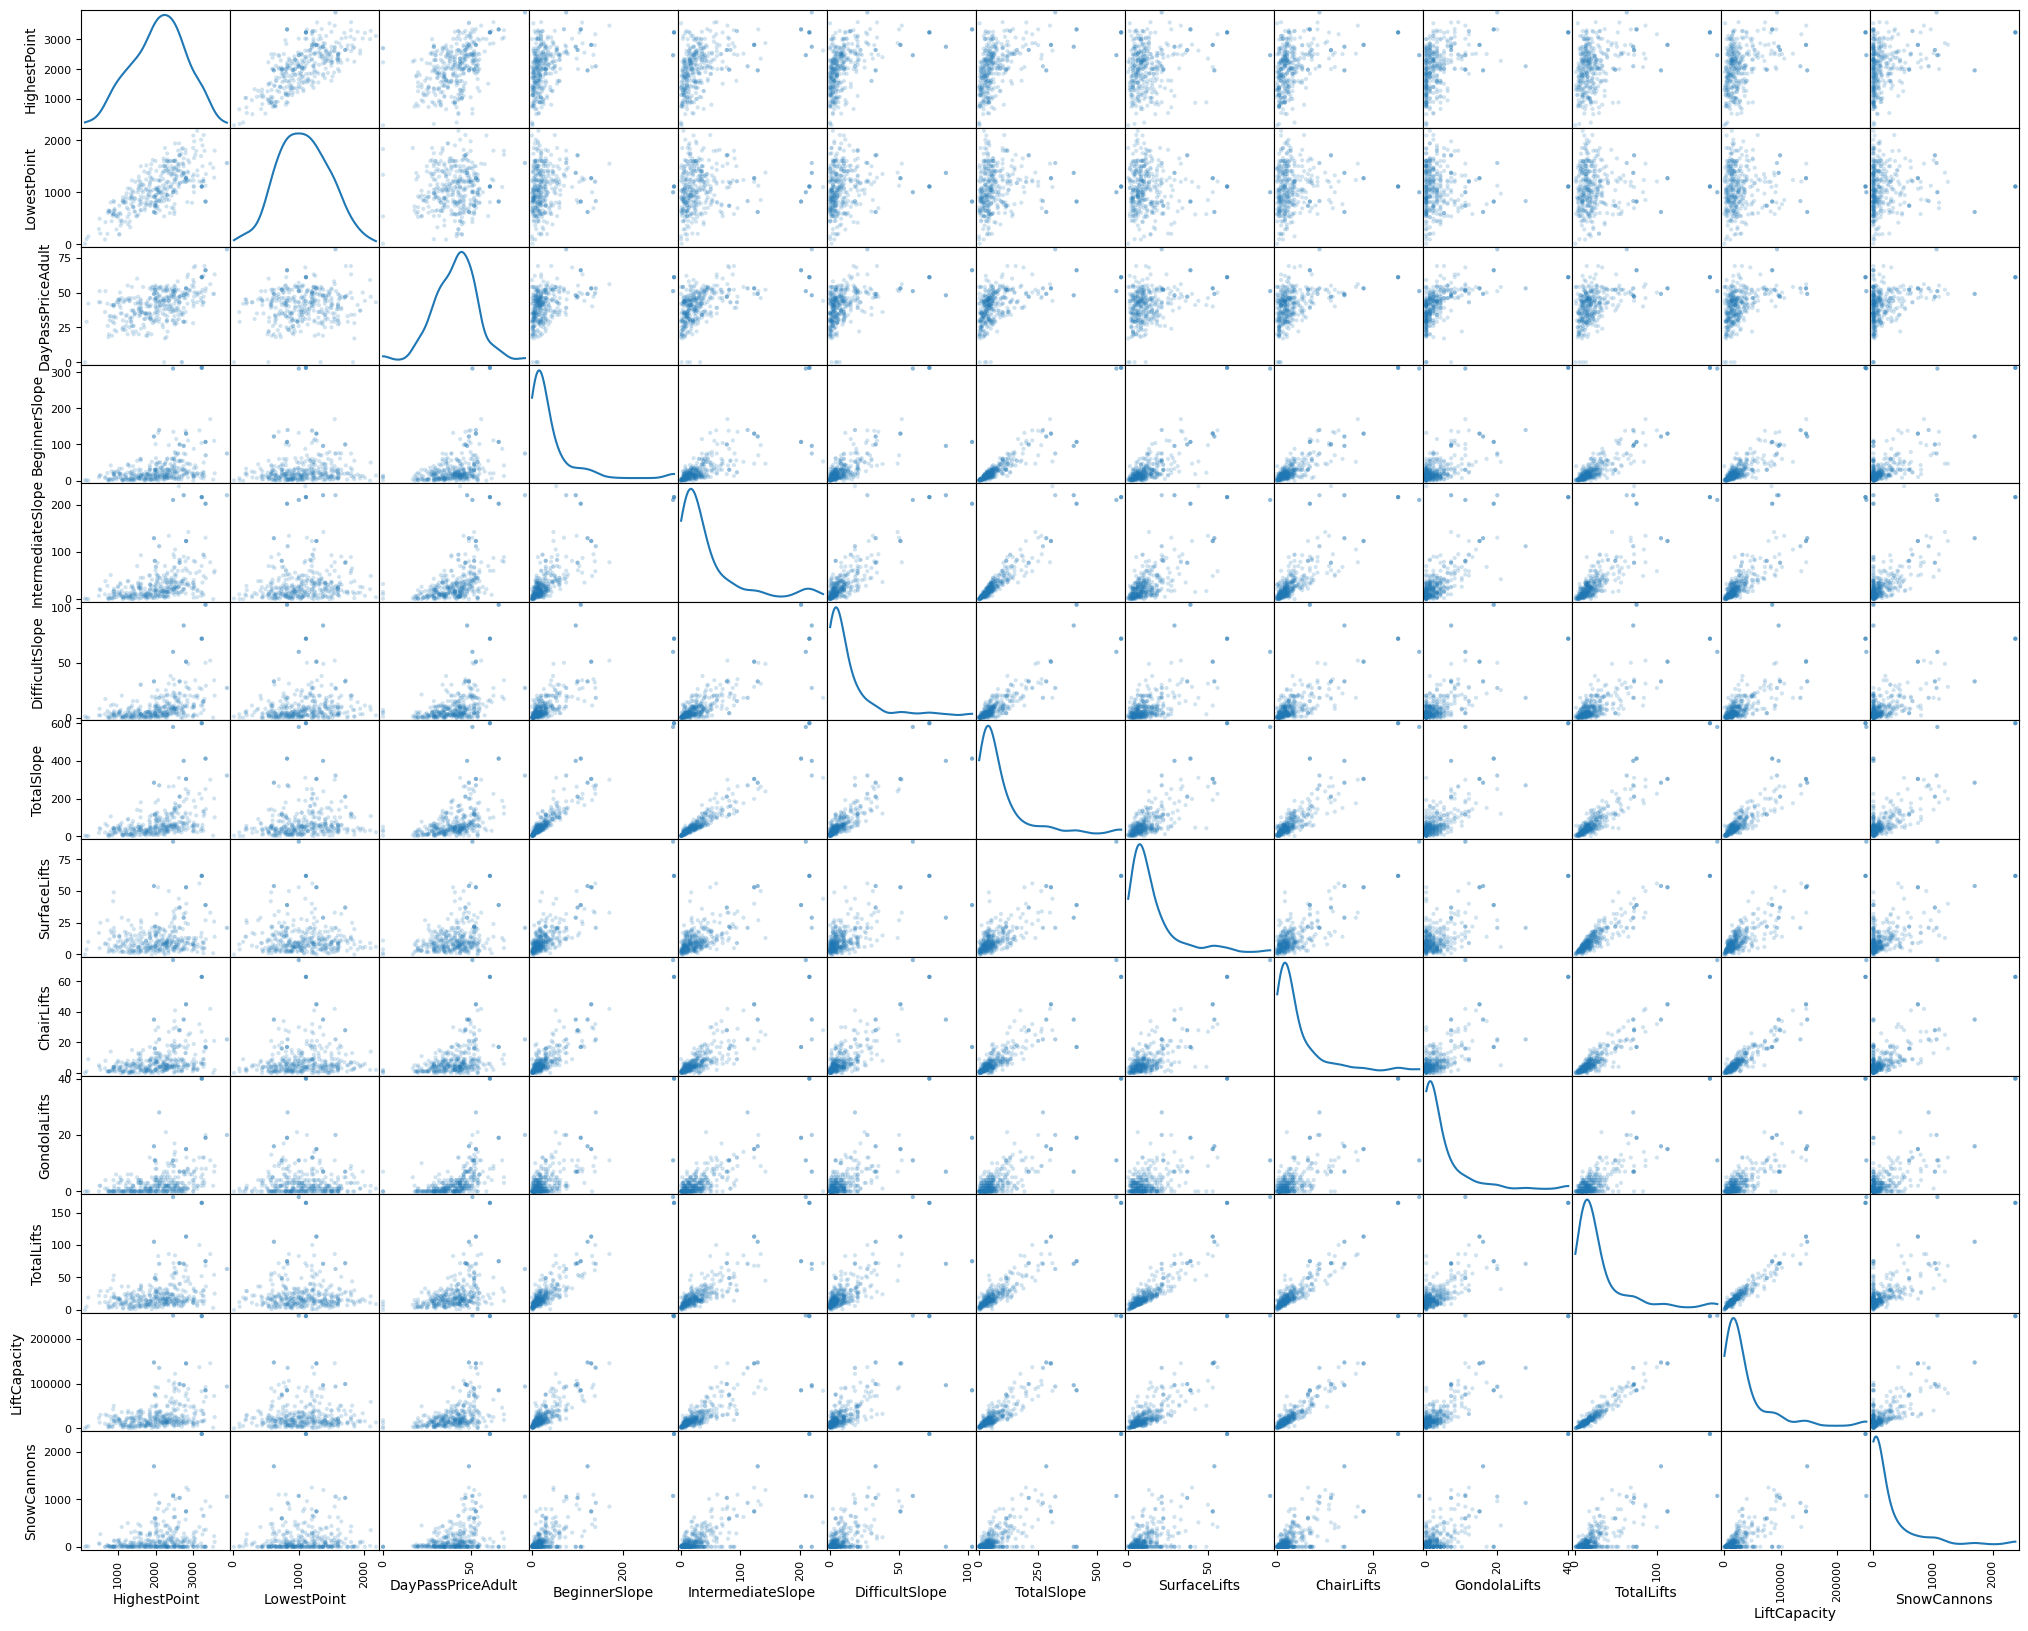

In [23]:
# your code
df_vnum = df_v[df_v.select_dtypes([np.number]).columns]

# Make the plot
scatter_matrix(df_vnum, alpha=0.2, figsize=(25, 20), diagonal='kde')
plt.show()

### **b) (3pts)**
Another way to detect correlation is to calculate the Pearson correlation coefficient. Calculate the correlation matrix for the numerical data and visualize the matrix using a heatmap. 
Briefly discuss your findings from the heatmap and the scatter plot you created in 2(a).

Make sure to annotate the heatmap with the values of the correlation.

*Hint: You can use the heatmap function from seaborn to make the plot.*

HighestPoint  LowestPoint  DayPassPriceAdult  \
HighestPoint           1.000000     0.690855           0.474562   
LowestPoint            0.690855     1.000000           0.101909   
DayPassPriceAdult      0.474562     0.101909           1.000000   
BeginnerSlope          0.395598     0.068579           0.424408   
IntermediateSlope      0.493116     0.094242           0.549071   
DifficultSlope         0.486473     0.104290           0.489344   
TotalSlope             0.477986     0.089805           0.516814   
SurfaceLifts           0.258042    -0.036061           0.367417   
ChairLifts             0.396413     0.076360           0.436581   
GondolaLifts           0.433478    -0.012420           0.544883   
TotalLifts             0.373200     0.011693           0.463984   
LiftCapacity           0.387280     0.020114           0.469859   
SnowCannons            0.326838     0.032361           0.397795   

                   BeginnerSlope  IntermediateSlope  DifficultSlope  \
HighestPoint            0.395598           0.493116        0.486473   
LowestPoint             0.068579           0.094242        0.104290   
DayPassPriceAdult       0.424408           0.549071        0.489344   
BeginnerSlope           1.000000           0.799331        0.763475   
IntermediateSlope       0.799331           1.000000        0.870134   
DifficultSlope          0.763475           0.870134        1.000000   
TotalSlope              0.941041           0.950400        0.897094   
SurfaceLifts            0.850545           0.766058        0.709414   
ChairLifts              0.921099           0.830683        0.746290   
GondolaLifts            0.784923           0.773212        0.710883   
TotalLifts              0.936289           0.857821        0.783950   
LiftCapacity            0.943078           0.848001        0.762309   
SnowCannons             0.801610           0.687927        0.554865   

                   TotalSlope  SurfaceLifts  ChairLifts  GondolaLifts  \
HighestPoint         0.477986      0.258042    0.396413      0.433478   
LowestPoint          0.089805     -0.036061    0.076360     -0.012420   
DayPassPriceAdult    0.516814      0.367417    0.436581      0.544883   
BeginnerSlope        0.941041      0.850545    0.921099      0.784923   
IntermediateSlope    0.950400      0.766058    0.830683      0.773212   
DifficultSlope       0.897094      0.709414    0.746290      0.710883   
TotalSlope           1.000000      0.847466    0.914837      0.819864   
SurfaceLifts         0.847466      1.000000    0.845702      0.632735   
ChairLifts           0.914837      0.845702    1.000000      0.750504   
GondolaLifts         0.819864      0.632735    0.750504      1.000000   
TotalLifts           0.939747      0.942569    0.958817      0.811605   
LiftCapacity         0.935279      0.885072    0.966896      0.845237   
SnowCannons          0.766030      0.693446    0.785548      0.798762   

                   TotalLifts  LiftCapacity  SnowCannons  
HighestPoint         0.373200      0.387280     0.326838  
LowestPoint          0.011693      0.020114     0.032361  
DayPassPriceAdult    0.463984      0.469859     0.397795  
BeginnerSlope        0.936289      0.943078     0.801610  
IntermediateSlope    0.857821      0.848001     0.687927  
DifficultSlope       0.783950      0.762309     0.554865  
TotalSlope           0.939747      0.935279     0.766030  
SurfaceLifts         0.942569      0.885072     0.693446  
ChairLifts           0.958817      0.966896     0.785548  
GondolaLifts         0.811605      0.845237     0.798762  
TotalLifts           1.000000      0.983769     0.811210  
LiftCapacity         0.983769      1.000000     0.843733  
SnowCannons          0.811210      0.843733     1.000000

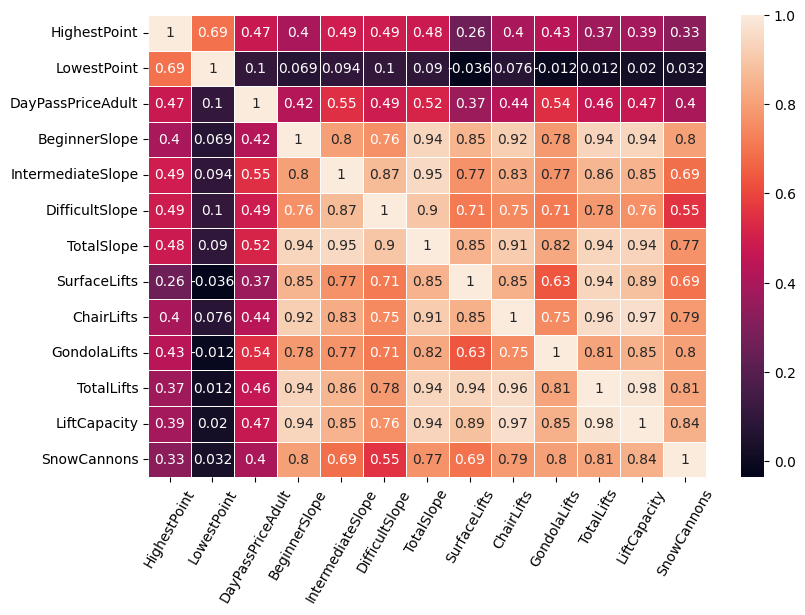

In [24]:
# your code
corr_mat = df_vnum.corr()
display(corr_mat)

fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_mat, annot=True, linewidths=.5, ax=ax)

ax.tick_params(axis='x', labelrotation=60)
del(ax,corr_mat,fig)

### **c) (4pts)** 
We now want to have an overview of the attribute "TotalSlope" aggregated by different levels of hierarchy (Europe -> Country -> Resort). It seems that a tree map is suitable for this purpose.

Make a tree map where
- the root node represents Europe.
- the child nodes of Europe are countries.
- the child nodes of each country are the ski resorts.
- the size of the rectangles is determined by the attribute "TotalSlope".

Also, use the tree map to find out
1. The sum of TotalSlopes of a country, list the top five countries and the corresponding values.
2. The max value of TotalSlope of the five countries you identified in 1.

*Hint: You can use the treemap function from plotly.express.*

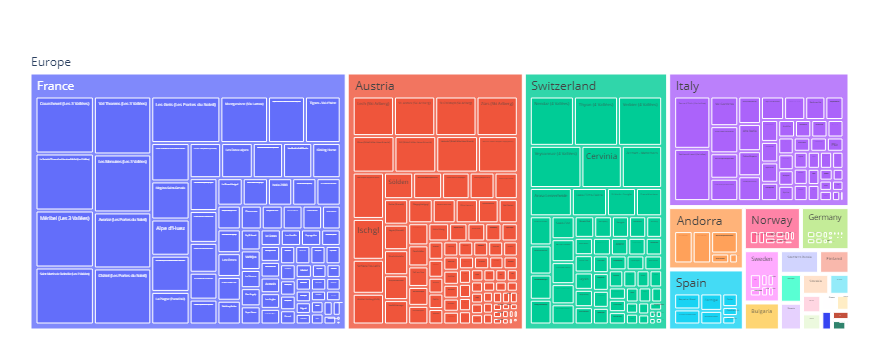

In [25]:
# your code
fig = px.treemap(df_v[['Country','Resort','TotalSlope']], path=[px.Constant("Europe"), 'Country', 'Resort'], values='TotalSlope')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

**Your answer for...** \
*...  1. The sum of TotalSlopes of a country. List the top five countries and the corresponding values:* \


1.   France: 12546
2.   Austria: 7005
3.   Switzerland: 5710
4.   Italy: 3742
5.   Andorra: 723

*...  2. The max value of TotalSlope of the five countries you identified in 1:*

1.   France: 600
2.   Austria: 304
3.   Switzerland: 412
4.   Italy: 400
5.   Andorra: 210

### **d) (3pts)** 

An alternative to a tree map is a sunburst plot, the principle is similar to a tree map. 

Recall from the lecture that:
- Each ring is a different level of the hierarchy
- Each segment of a ring belongs to one categorical value
- The size of a segment is either divided proportionally to a value

Now, we would like to have an overview of the attribute "TotalLifts" aggregated by different level of hierarchy.

Make a sunburst plot where
- the first hierarchy(ring) is "Country"
- the second hierarchy(ring) is "Snowparks" (whether the resort has snowparks)
- the third hierarchy(ring) is "Resort"
- the size of the segments is determined by the attribute "TotalLifts".

Then, briefly discuss your findings from the plot.

*Hint: You can use the sunburst function from plotly.express.*

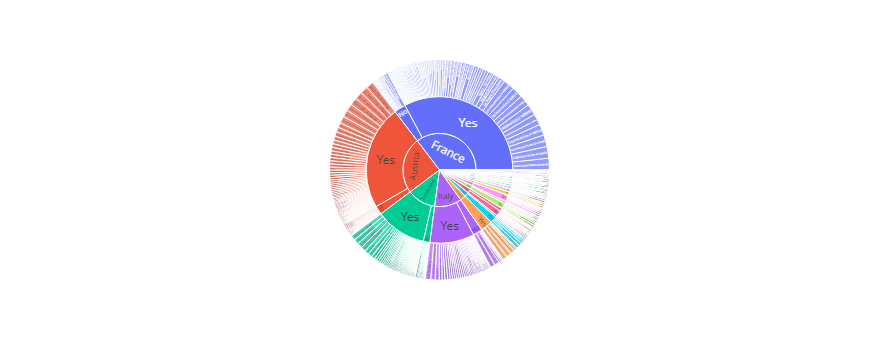

In [26]:
# your code
fig = px.sunburst(df_v[['Country','Snowparks','Resort','TotalLifts']], path=['Country','Snowparks','Resort'], values='TotalLifts')
fig.show()

**Your answer:**
We observe that the top five countries with biggest sum of TotalSlope are also the top five with the greatest amount of lifts. 

Considering the second ring, we can see that is more common for resorts to have snowparks thank the lack of them. 

It comes to our attention that the difference between the number of lifts in France and Austria is not as large as the difference in their total slopes. This means that austrian resorts have more amount of lifts per slope.

In [27]:
del(df_v,df_vnum,fig)

## Question 3 - Frequent Item Sets and Association Rules (15 points)

In [28]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules as arule

### A real online retail transaction data set of two years.

Data Set Information:
This Retail dataset contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift ware. Many customers of the company are wholesalers.

Attribute Information:
- Invoice: Invoice number. Nominal. A 6-digit integral number is uniquely assigned to each transaction. If the number starts with 'C' it refers to a canceled transaction.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
- Price: Unit price. Numeric. Product price per unit in sterling (£).
- CustomerID: Customer number. Nominal. A 5-digit integral number is uniquely assigned to each customer. This number has postfix 'n'.
- Country: Country name. Nominal. The name of the country where a customer resides.

### a) Loading, exploring and preprocessing the dataset (4 pts)

#### **a(i)** 
Load the data from `retail.csv` and save it under the variable `retail_df`. Display the first few lines of the dataframe.

In [29]:
retail_df = pd.read_csv('retail.csv')

# Print the name of the dataframe columns
print(retail_df.columns)

display(retail_df.head())

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country'],
      dtype='object')


Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  Price  CustomerID         Country  
0  01/12/2010 08:26   2.55      178500  United Kingdom  
1  01/12/2010 08:26   3.39      178500  United Kingdom  
2  01/12/2010 08:26   2.75      178500  United Kingdom  
3  01/12/2010 08:26   3.39      178500  United Kingdom  
4  01/12/2010 08:26   3.39      178500  United Kingdom

#### **a(ii)** 
To get to know the dataset, do the following:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of unique product names.
- Show the number of unique invoices.
- Show the number and the list of all the countries where the customers reside.

In [30]:
#Showing the number of rows in the dataset
print('Number of rows: ' + str(retail_df.shape[0]))

# Showing the number of unique customers
print('Number of unique customers: ' + str(retail_df['CustomerID'].nunique()))

# Showing the number of unique product names
print('Number of unique product names: ' + str(retail_df['Description'].nunique()))

# Showing the number of unique invoices
print('Number of unique invoices: ' + str(retail_df['Invoice'].nunique()))

# Show the number and list of all countries
print('Number of unique countries: ' + str(retail_df['Country'].nunique()))
print('List of countries: ' + str(retail_df['Country'].unique()))

Number of rows: 406525
Number of unique customers: 4367
Number of unique product names: 3896
Number of unique invoices: 22177
Number of unique countries: 35
List of countries: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada' 'Brazil'
 'USA' 'Bahrain' 'Malta' 'RSA']


#### **a(iii)** 
You are interested in analyzing itemsets that are frequently purchased together. Before continuing with that task, you have to make sure that the data are fit for such analysis. 1) More precisely, you want to make sure that there are no missing values in the data. 2) Moreover, you want to ensure that each item's name in the "Description" is consistent. E.g., you want "Description" values such as " coffee black", "coffee &nbsp;black", " coffee black &nbsp;", etc. to be mapped to the same value (e.g. "coffee black"). 3) Last but not least, you want to remove transactions that were canceled. Such transactions correspond to rows where the invoice number starts with letter 'C'.

Apply these preprocessing steps to the dataset `retail_df` and apply them on the dataframe itself (e.g. set inplace=True).

In [31]:
# Checking datatype of each columm
print(retail_df.dtypes)

# Check for missing values in the data, that is if there are any entries with NaN´
if retail_df.isnull().values.any():
  print('Dataset has missing values')
  retail_df.dropna(0, inplace = True)
  retail_df.reset_index(drop=True, inplace=True)

else:
  print('There are no missing values')

# It will be considered a missing value as well, all invoices with a quantity of 0,
# as this means that a transaction did not occur.

# Check if there are any any transactions with 0 products sold
invoices_with_0_products = retail_df.loc[retail_df['Quantity']==0]

if (invoices_with_0_products.shape[0]==0):
  print('There are no transactions with 0 products sold')

# Consideration 2
# Obtain the description of all items
for count, value in enumerate(retail_df['Description'].values):
  # Remove duplicated and leading and trailing whitespaces
  retail_df.at[count, 'Description'] = " ".join(value.split())
  # Remove points, commas, - or white spaces at the end of the object description
  retail_df.at[count, 'Description'] = value.rstrip('.,- ')

del count, value

# Consideration 3: Remove transactions that were cancelled
# Find transactions that were cancelled
row_index_cancelled = []
for count, value in enumerate(retail_df['Invoice'].values):
  if value[0] == 'C':
    row_index_cancelled.append(count)

# Drop cancelled transactions
retail_df.drop(row_index_cancelled, inplace = True)
retail_df.reset_index(drop=True, inplace=True)


Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
CustomerID       int64
Country         object
dtype: object
There are no missing values
There are no transactions with 0 products sold


#### **a(iv)** 
After applying the preprocessing steps in **a(iii)** , repeat again the task **a(ii)**, that is:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of all unique product names.
- Show the list of all the countries where the customers reside.

Which values changed?

In [32]:
#Showing the number of rows in the dataset
print('Number of rows: ' + str(retail_df.shape[0]))

# Showing the number of unique customers
print('Number of unique customers: ' + str(retail_df['CustomerID'].nunique()))

# Showing the number of unique product names
print('Number of unique product names: ' + str(retail_df['Description'].nunique()))

# Showing the number of unique invoices
print('Number of unique invoices: ' + str(retail_df['Invoice'].nunique()))

# Show the number and list of all countries
print('Number of unique countries: ' + str(retail_df['Country'].nunique()))
print('List of countries: ' + str(retail_df['Country'].unique()))

Number of rows: 397621
Number of unique customers: 4334
Number of unique product names: 3868
Number of unique invoices: 18524
Number of unique countries: 35
List of countries: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Brazil' 'USA' 'Bahrain' 'Malta' 'RSA']


**Your answer:** 
*The values that changed are the number of total rows, the number of unique customers, the number of unique product names and the number of invoices. Meanwhile the number of unique countries did not change.*

### b) Frequent itemsets and Association rules (8 pts)

#### **b(i)** 
Each invoice number in the dataset identifies a unique transaction. There are potentially many rows in the dataframe having the same invoice number. We want to analyze items that are frequently purchased together, that is, items that appear in the same transaction.

Create a new dataframe named `transaction_df` with two columns: "Invoice" and "Description". Here the "Invoice" value is the index of the dataframe (the unique number identifying each row) and "Description" is the column containing all items (without duplicates) purchased within the transaction with that invoice number. Display the first few rows of your dataframe. How many rows does the `transaction_df` have?

In [33]:
# Determine all unique transactions (i.e. invoices)
transaction_df = retail_df[['Invoice','Description']].groupby(['Invoice'],as_index=False).agg(list)
display(transaction_df.head(5))
print(f'transaction_df has {transaction_df.shape[0]} rows')

Invoice                                        Description
0  536365  [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
1  536366  [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
2  536367  [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
3  536368  [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
4  536369                         [BATH BUILDING BLOCK WORD]

transaction_df has 18524 rows


**Your answer:**
*The number of rows of transaction_df is displayed in the above code.*

#### **b(ii)** 
Next, we want to compute frequent itemsets and association rules based on the sets of items ordered together. Use the TransactionEncoder to transform `transaction_df` into a matrix such that the value in the i-th row and the j-th column is $True$ if the i-th itemset contains product j, and $False$ otherwise. Save the matrix into a dataframe named `transactions`. Display the shape of the matrix.

*Hint: Note that your dataframe 'transactions' must contain as many rows as there are invoice numbers and as many columns as there are unique products.*

In [34]:
itemsets = transaction_df['Description'].tolist()
te = TransactionEncoder()
transactions_array = te.fit(itemsets).transform(itemsets)

# Create dataframe fromboolean matrix and name columns appropiately
transactions = pd.DataFrame(transactions_array, columns = te.columns_)

display(transactions.shape)

# It can be seen that the number of rows corresponds to the number of invoices
# Now we check whether the number of columns corresponds to the number of unique products
print('Number of unique products: ' + str(retail_df['Description'].nunique()))



(18524, 3868)

Number of unique products: 3868


#### **b(iii)** 
Use the apriori method on `transactions` to obtain all frequent itemsets using min_support=0.01. Display all frequent itemsets that have at least three items. What support count does an itemset have for our case if it satisfies min_support=0.01?

In [35]:
from math import ceil

frequent_itemsets = apriori(transactions, min_support = 0.01, use_colnames = True)

# Display frequent itemsets that have more than three items
more_than_three_elements_itemsets = []
for itemset in frequent_itemsets['itemsets'].values:
  if len(itemset) > 2:
    more_than_three_elements_itemsets.append([set(itemset)])

df_itemset_more_3 = pd.DataFrame(more_than_three_elements_itemsets, columns = ['Itemset']) 
print('All frequent itemsets with at least three elements are: ')
display(df_itemset_more_3)

print(f'Support count for any frequent itemset has to be greater or equal to: {ceil(0.01 * transactions.shape[0])} ')


All frequent itemsets with at least three elements are: 


Itemset
0   {ALARM CLOCK BAKELIKE IVORY, ALARM CLOCK BAKEL...
1   {ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...
2   {GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...
3   {GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...
4   {GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...
5   {JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA...
6   {JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG...
7   {JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SU...
8   {JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SU...
9   {LUNCH BAG RED RETROSPOT, JUMBO BAG RED RETROS...
10  {LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...
11  {LUNCH BAG APPLE DESIGN, LUNCH BAG SUKI DESIGN...
12  {LUNCH BAG  BLACK SKULL, LUNCH BAG CARS BLUE, ...
13  {LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...
14  {LUNCH BAG SPACEBOY DESIGN, LUNCH BAG CARS BLU...
15  {LUNCH BAG SUKI DESIGN, LUNCH BAG CARS BLUE, L...
16  {LUNCH BAG WOODLAND, LUNCH BAG  BLACK SKULL, L...
17  {LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...
18  {LUNCH BAG SPACEBOY DESIGN, LUNCH BAG  BLACK S...
19  {LUNCH BAG  BLACK SKULL, LUNCH BAG SUKI DESIGN...
20  {LUNCH BAG WOODLAND, LUNCH BAG  BLACK SKULL, L...
21  {LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...
22  {LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG...
23  {LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND, ...
24  {LUNCH BAG SPACEBOY DESIGN, LUNCH BAG SUKI DES...
25  {LUNCH BAG WOODLAND, LUNCH BAG  BLACK SKULL, L...
26  {LUNCH BAG WOODLAND, LUNCH BAG SUKI DESIGN, LU...
27  {LUNCH BAG RED RETROSPOT, LUNCH BAG APPLE DESI...
28  {LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...
29  {LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG...
30  {LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND, ...
31  {LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE,...
32  {LUNCH BAG SPACEBOY DESIGN, LUNCH BAG CARS BLU...
33  {LUNCH BAG SUKI DESIGN, LUNCH BAG CARS BLUE, L...
34  {LUNCH BAG WOODLAND, LUNCH BAG CARS BLUE, LUNC...
35  {LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...
36  {LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG...
37  {LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND, ...
38  {LUNCH BAG SPACEBOY DESIGN, LUNCH BAG SUKI DES...
39  {LUNCH BAG WOODLAND, LUNCH BAG SPACEBOY DESIGN...
40  {LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...
41  {LUNCH BAG WOODLAND, LUNCH BAG SPACEBOY DESIGN...
42  {LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...
43  {LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG...
44  {LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND, ...
45  {LUNCH BAG WOODLAND, LUNCH BAG SPACEBOY DESIGN...
46  {LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...
47  {LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND, ...
48  {LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND, ...
49  {PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...
50  {POPPY'S PLAYHOUSE LIVINGROOM, POPPY'S PLAYHOU...
51  {GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...
52  {LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...

Support count for any frequent itemset has to be greater or equal to: 186 


**Your answer:**
*An itemset in our dataset has a min_support = 0.01. The support count can be found by multiplying this min_support by the total number of transactions in our dataset. This corresponds to the number of unique invoices.*

*The support count for any frequent itemset is displayed in the code above*

#### **b(iv)**
Now we will discover association rules from the frequent itemsets. Using only the frequent itemsets with min_support=0.01 (the ones obtained in **b(iii)**), generate different association rules using min_conf=0.6 and min_conf=0.9 as thresholds. Show the association rules for each of the thresholds. What do you notice w.r.t. the number of association rules produced for the different thresholds?

In [36]:
# Association rule with min_conf = 0.6
association_rules_conf_6 = arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.7)
display(association_rules_conf_6)

# Association rule with min_conf = 0.9
association_rules_conf_9 = arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.9)
display(association_rules_conf_9)

antecedents  \
0                    (ALARM CLOCK BAKELIKE CHOCOLATE)   
1                      (PAINTED METAL PEARS ASSORTED)   
2                        (BAKING SET SPACEBOY DESIGN)   
3                                 (TOILET METAL SIGN)   
4                       (PINK HAPPY BIRTHDAY BUNTING)   
..                                                ...   
56  (GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...   
57  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
58  (PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...   
59  (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...   
60  (LUNCH BAG  BLACK SKULL, LUNCH BAG CARS BLUE, ...   

                                          consequents  antecedent support  \
0                          (ALARM CLOCK BAKELIKE RED)            0.017383   
1                     (ASSORTED COLOUR BIRD ORNAMENT)            0.019002   
2                      (BAKING SET 9 PIECE RETROSPOT)            0.022889   
3                               (BATHROOM METAL SIGN)            0.016303   
4                       (BLUE HAPPY BIRTHDAY BUNTING)            0.019380   
..                                                ...                 ...   
56                   (PINK REGENCY TEACUP AND SAUCER)            0.016843   
57                  (GREEN REGENCY TEACUP AND SAUCER)            0.014306   
58  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...            0.016681   
59                          (LUNCH BAG PINK POLKADOT)            0.014144   
60                          (LUNCH BAG RED RETROSPOT)            0.014036   

    consequent support   support  confidence       lift  leverage  conviction  
0             0.047290  0.012200    0.701863  14.841686  0.011378    3.195548  
1             0.074066  0.013766    0.724432   9.780886  0.012358    3.360090  
2             0.046102  0.016789    0.733491  15.910046  0.015734    3.579227  
3             0.022619  0.012146    0.745033  32.937932  0.011778    3.833363  
4             0.019164  0.013712    0.707521  36.918639  0.013341    3.353524  
..                 ...       ...         ...        ...       ...         ...  
56            0.030015  0.012902    0.766026  25.521329  0.012397    4.145689  
57            0.037303  0.012902    0.901887  24.177353  0.012369    9.812104  
58            0.029205  0.012902    0.773463  26.483594  0.012415    4.285365  
59            0.050259  0.010419    0.736641  14.656866  0.009708    3.606262  
60            0.069531  0.010419    0.742308  10.675860  0.009443    3.610774  

[61 rows x 9 columns]

antecedents  \
0                           (REGENCY TEA PLATE PINK)   
1  (POPPY'S PLAYHOUSE LIVINGROOM, POPPY'S PLAYHOU...   
2  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   

                         consequents  antecedent support  consequent support  \
0          (REGENCY TEA PLATE GREEN)            0.012092            0.014576   
1        (POPPY'S PLAYHOUSE KITCHEN)            0.011067            0.018678   
2  (GREEN REGENCY TEACUP AND SAUCER)            0.014306            0.037303   

    support  confidence       lift  leverage  conviction  
0  0.010905    0.901786  61.869180  0.010729   10.033411  
1  0.010041    0.907317  48.575553  0.009834   10.587943  
2  0.012902    0.901887  24.177353  0.012369    9.812104

**Your answer:**
*As the minimum support threshold increases, the number of possible frequent itemsets decreases*.

#### **b(v)** 
From the association rules that satisfy the confidence threshold 0.6, select and show the two rules with the highest lift. What do you notice if you compare the two rules with each other?

In [37]:
# Sort out the dataframe based on lift and select the first two rows
print('The two association rules for the confidence thresholds of 0.6 with the highest lift are: ')
display(association_rules_conf_6.sort_values(by = ['lift'], ascending = False).head(2))

The two association rules for the confidence thresholds of 0.6 with the highest lift are: 


antecedents                consequents  antecedent support  \
22  (REGENCY TEA PLATE GREEN)   (REGENCY TEA PLATE PINK)            0.014576   
21   (REGENCY TEA PLATE PINK)  (REGENCY TEA PLATE GREEN)            0.012092   

    consequent support   support  confidence      lift  leverage  conviction  
22            0.012092  0.010905    0.748148  61.86918  0.010729    3.922574  
21            0.014576  0.010905    0.901786  61.86918  0.010729   10.033411

**Your answer:**
*Both rules contain the same lift, support and leverage. If we consider the first row to represent the following transaction $A \longrightarrow B$. Then the second row shows $B \longrightarrow A$*

*As a result, the lift and support of both rows is the same. $lift ≫ 1$. Therefore, both A and B are positive correlated and the presence of one heavily implies the presence of the other. We have selected the two transactions with the greatest correlation.*

*However it is interesting to note that $B \longrightarrow A$ has a higher confidence than it's inverse. This means  that from a probabilistic view, the conditional probability that an instance contains the items in B given that it contains the items in A is higher than the other way around.*



#### **b(vi)** 

In the analysis tasks in **b)**, an itemset consisted of items that had the same invoice number (same transaction items). Thus, if an itemset was frequent, it meant that the items in it were frequently purchased together.
An association rule $A \Rightarrow B$ meant that if items in $A$ are purchased, then the items in $B$ are also purchased in that same transaction.

Suppose that we would repeat the analysis, but this time, the itemsets would consist of items having the same "CustomerID" (bought from the same customer). Interpret the meaning of the frequent itemsets and association rules for this kind of itemsets.

**Your answer:**
*If the transactions had then been sorted out in terms of customer IDs. Then the resulting association rules would allows us to determine what products a customer tends to buy if he buys another product. These products bought do not have to be in the same transaction, but instead we consider all of the transactions associated to that customer* 

*Because each invoice is already associated to one unique CustomerID. The association rules associated with Customer IDs can be thought of as providing more generalised relations. The products bought by the customer are not bound to a unique transaction*


### c) Sequence Mining (3 pts)

For this task, the dataset used is `retail_sequences.csv`. Run the cell below to save the dataset under the dataframe `retail_sequences`. Each row in the dataframe corresponds to a unique customer (from the retail dataset). The "Customer" column contains the customer ID, whereas the "Sequence" column contains the sequence of itemsets  purchased by that customer.  Each value of "Sequence" is a sequence (list) of itemsets $<I_1, I_2, ..., I_n>$. The items within the same itemset (list without duplicates) $I_i$ were purchased together (they had the same invoice number). The itemsets are ordered by the timestamp of the transaction (value of InvoiceDate).

In [38]:
retail_sequences = pd.read_csv('retail_sequences.csv')

import ast

Given is the sequence *s= <{'lunch bag cars blue'}, {'herb marker rosemary','herb marker thyme'}, {'wooden star christmas scandinavian'}>*. Compute the support count of that sequence, that is, compute the number of customers whose corresponding itemset sequence contains it. Display its support count and the IDs of those customers.

*Hint: In the dataset provided, all product names are unified. They are all lowercase and have no trailing spaces.*

In [39]:
s = [['lunch bag cars blue'], ['herb marker rosemary', 'herb marker thyme'] ,['wooden star christmas scandinavian']]

In [40]:
# List of sequences 
sequences_customers = retail_sequences['Sequence'].values

def contained(sequence1, sequence2):
  if len(sequence1) > len(sequence2):
    return False

  pos2 = 0
  count = 0
  el_num = 0

  for seq_1 in sequence1:

    for i in range(pos2, len(sequence2) + 1):      
      if count == len(seq_1):
        pos2 = i
        el_num += 1
        break

      elif (i == len(sequence2)):
        return False

      seq_2 = sequence2[i]
      pos_occurance = -1
      count = 0

      for item_seq_1 in seq_1:

        if str(item_seq_1) in " ".join(seq_2)[pos_occurance + 1:]:
          pos_occurance = " ".join(seq_2).index(str(item_seq_1))
          count += 1
          continue

        else:
          break
      
  if el_num == len(sequence1):
    return True

  else:
    return False

count_num_customers = 0;
customer_row = []

for count, sequence_customer in enumerate(sequences_customers):
  sequence_customer_list = ast.literal_eval(sequence_customer)
  if contained(s, sequence_customer_list):
    count_num_customers += 1
    customer_row.append(count)


# Testing of code
A = [["A"], ["B", "A" ,"C"]]
A2 = [["A"], ["B","C"]]
A3 = [["A"], ["B","C", "D"]]

B = [["A", "B"], ["C", "B"],["B", "A" ,"D","C"]]

print('Test code 1: ')
print(contained(A, B))

print('Test code 2: ')
print(contained(A2, B))

print('Test code 3: ')
print(contained(A3, B))

customer_ids = retail_sequences["Customer"].iloc[customer_row].tolist()

display(f"Support Count of that sequence: {count_num_customers}")
display(f"Id of customers: {customer_ids}")


Test code 1: 
True
Test code 2: 
True
Test code 3: 
False


'Support Count of that sequence: 4'

'Id of customers: [127480, 178410, 130500, 132630]'

## Question 4: Text Mining (12 pts)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.lm.preprocessing import padded_everygram_pipeline

### F.R.I.E.N.D.S.

In this task we will use the script from the well-known series "F.R.I.E.N.D.S.". We will apply feature extraction methods to map the line of each main character onto a vector of a vector space. Then we will train a classifier whose aim will be to predict the name of the character given a particular line from the script.
In the end, we will train language models using N-grams and produce fake sentences for each of the main characters.

### a) Data Loading and Preprocessing (4 pts)

#### **a(i)** 
Import the file `FRIENDS.csv` and save it into a dataframe named `friends_df`. Note that the dataframe must contain two columns: one indicating the character's name and one containing a line from the script. Display the first few lines from the dataframe.

<i>FYI: The script has been filtered so that it only contains lines from the main characters. The order of the lines in the data is the same as the order of the lines in the original script. Metadata and scene descriptions have been removed. Your corpus consists of all the lines contained in the data. Each row's "line" value is a single document. </i>

In [42]:
# your code
friends_df = pd.read_csv("FRIENDS.csv")
display(friends_df.head(5))

character                                               line
0    Monica   There's nothing to tell! He's just some guy I...
1      Joey   C'mon  you're going out with the guy! There's...
2  Chandler   All right Joey  be nice.  So does he have a h...
3    Phoebe                           Wait  does he eat chalk?
4    Phoebe   Just  'cause  I don't want her to go through ...

#### **a(ii)**  
Plot the line count distribution among the six main characters (the six possible values of the column "character"). For example, show a plot containing one bar for each character whose height reflects the number of lines in `friends_df`. Briefly comment on the plot.

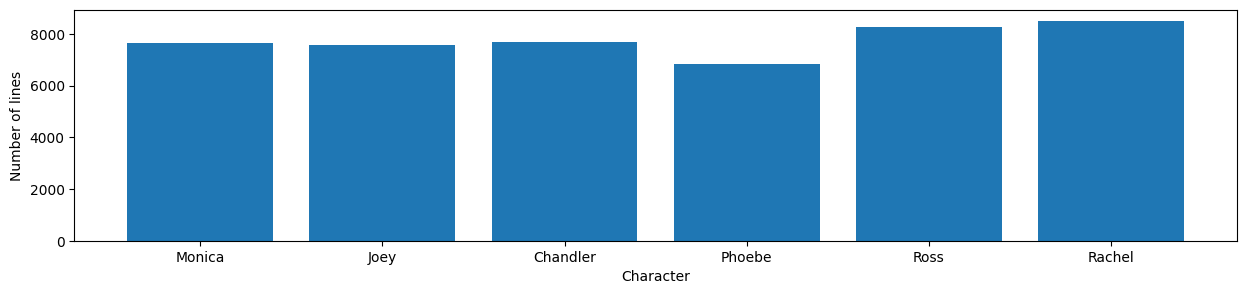

array([7651., 7573., 7687., 6833., 8264., 8506.])

In [43]:
plt.figure(figsize = (15, 3))
n, bins, patches = plt.hist(friends_df['character'],bins=range(0,7), align='left', rwidth=0.8)
plt.ylabel('Number of lines')
plt.xlabel('Character')
plt.show()
display(n)

**Your answer:**
In the graph it is shown that the six characters have an amount of lines between 6000 and 8000 approximately. In this script, Ross and Rachel have more lines than the rest of the characters, while Phoebe has less. Monica, Joey and Chandler have a similar count of lines.

#### **a(iii)**  
Create a corpus named `corpus` such that each document in the corpus corresponds to exactly one row's "line" in `friends_df`.

In [44]:
# your code
corpus =  friends_df['line'].tolist()

#### **a(iv)**  
Write a function called `my_preprocessor` which, given a string, returns another string after tokenization, stopword removal and lemmatization have been applied. The remaining terms (tokens after stopword removal and lemmatization has been applied) should be joined in the same string using space ' '.

In [45]:
import nltk
#for sentence tokenization, word tokenization
from nltk.tokenize import sent_tokenize, word_tokenize

#for tokenization and punctuation removal 
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')

#to filter out stop words
nltk.download("stopwords")
from nltk.corpus import stopwords

#for lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4') # omw=open multilingual wordnet

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [46]:
# your code
lemmatizer = WordNetLemmatizer()
tokenizer = nltk.RegexpTokenizer(r"\w+")
stop_list = stopwords.words("english")

def my_preprocessor(text):
  sentences = sent_tokenize(text)
  preprocessed = ''
  separator = " "
  for sentence in sentences:
    #tokenization
    tokenized = tokenizer.tokenize(sentence)

    #stopword removal
    filtered = [word.lower() for word in tokenized if word.lower() not in stop_list]

    #lemmatization
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered]
    preprocessed += separator.join(lemmatized) + ' '
  
  return preprocessed

#### **a(v)**   
You must apply your preprocessor `my_preprocessor` on each line contained in the `corpus`. Create a preprocessed corpus named `corpus_p` which contains the same lines as `corpus` after the preprocessor `my_preprocessor` has been applied.

In [47]:
corpus_p = list(map(my_preprocessor,corpus))

#### **a(vi)**   
Split the `friends_df` dataset from the previous task into training (80%) and test (20%) data preserving the distribution based on the "character" value. 

In [48]:
# your code
friends_train, friends_test = train_test_split(friends_df, test_size = 0.2, stratify=friends_df['character'])

#### **a(vii)**   
Similar to **a(iii)**, for the training data and the test data, create two corpora named `corpus_train` and `corpus_test` respectively. Each document in the training (test) corpus must correspond to exactly one row's "line" value in the corresponding training (test) dataframe.

In [49]:
# your code
corpus_train =  friends_train['line'].tolist()
corpus_test =  friends_test['line'].tolist()

### b) Set of Words (4.5 pts)

#### **b(i)**  
We want to encode our text in such a way that for each word in the vocabulary, we are only interested in whether the word appears or not in a given document. Create such a Set of Words encoding for the whole corpus `corpus`. Use the previously defined preprocessor `my_preprocessor` as preprocessor.

In [50]:
# your code
sow = CountVectorizer(binary=True, preprocessor=my_preprocessor)
corpus_vectors = sow.fit(corpus)

#### **b(ii)**  
Pick one (any) of the lines of the "line" column in the `friends_df` dataset. Display the line in:
    1) its original form, 
    2) its preprocessed version (the result contained in `corpus_p` after applying `my_preprocessor`), and 
    3) its encoding computed by the Set of Words method. This can be either an array (a vector) or a scipy matrix. 
Briefly comment on the Set of Words encoding.

In [51]:
# your code
line = corpus[1046]
print('Original line: \n' + '        ' + line)
line_p = my_preprocessor(line)
print('Preprocessed line: \n' + '        ' + line_p)
line_sow = sow.transform([line]).toarray()
print( 'SoW array and 1 position:')
display(np.where(line_sow == 1))

print('\n')

line = corpus[25897]
print('Original line: \n' + '        ' + line)
line_p = my_preprocessor(line)
print('Preprocessed line: \n' + '        ' + line_p)
line_sow = sow.transform([line]).toarray()
print( 'SoW array and 1 position:')
display(np.where(line_sow == 1))

Original line: 
         You were incredible! Brand new woman  ladies and gentlemen.
Preprocessed line: 
        incredible brand new woman lady gentleman 
SoW array and 1 position:


(array([0, 0, 0, 0, 0, 0]), array([ 1327,  4143,  5014,  5538,  6724, 11183]))



Original line: 
         Uh well  uh this is a silent auction. They lay out all the stuff here and then you write down your offer and then the highest bid gets it.
Preprocessed line: 
        uh well uh silent auction lay stuff write offer highest bid get 
SoW array and 1 position:


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  719,  1072,  4165,  4679,  5604,  6912,  9005,  9674, 10506,
        11004, 11259]))

**Your answer:**

The results printed show as well which position of the Set of Words is non-zero for the two sentences used. In the first one, after lemmatization there are 6 elements left. Hence, there are two 1's in the SoW array. 

We can observe in the second sentence that one of the elements is duplicated (uh). We then obtain a 12-element list after lemmatization, but only 11 positions of the SoW array are non-zero.

#### **b(iii)**  
Create a Set of Words encoding based only on the documents in `corpus_train`. Use the previously defined preprocessor `my_preprocessor` as a preprocessor.

In [52]:
# your code
sow = CountVectorizer(binary=True, preprocessor=my_preprocessor)
corpus_vectors_train = sow.fit(corpus_train)

#### **b(iv)**  
In this task, we will use an SGD (Stochastic Gradient Descend) classifier to predict the character given a line from the corpus. Train the classifier on the Set of Words encoding of training corpus `corpus_train` using the character as the target feature and 'log_loss' as the loss function. Apply the classifier on the Set of Words encodings of both the training corpus and the test corpus `corpus_train`. Show its accuracy for both the training corpus and the test corpus.

In [53]:
# your code
target_feature = friends_train["character"]
target_feat_list = target_feature.tolist()
classifier = SGDClassifier(loss='log')
classifier.fit(sow.transform(corpus_train), target_feat_list)

train_pred = classifier.predict(sow.transform(corpus_train))
test_pred = classifier.predict(sow.transform(corpus_test))

#Now, we show its accuracy
train_accuracy = accuracy_score(target_feat_list, train_pred)
print("Accuracy on training corpus: " + str(round(train_accuracy*100,2)) + '%')
test_accuracy = accuracy_score(friends_test["character"], test_pred)
print("Accuracy on test corpus: " + str(round(test_accuracy*100,2)) + '%')

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



Accuracy on training corpus: 41.96%
Accuracy on test corpus: 29.71%


#### **b(v)**  
Briefly comment on the accuracy of the classifier compared to the expected accuracy of a random guesser (here: a model that simply guesses each character according to a distribution based on the line count). Use the line count distribution shown in **a(ii)** to reason about the approximate accuracy of the random guesser.

**Your answer:** The accuracy of the classifier on the training corpus is around 42%, and on the test corpus is around 29%. These values indicate that the classifier is not performing well, as it is not able to correctly classify the characters in the corpus with a high degree of accuracy.

Compared to the expected accuracy of a random guesser, which would be based on the line count distribution of the characters, the classifier is performing worse. The random guesser would have an approximate accuracy of around 20% because the character with the most lines in the corpus (Rachel) has around 20% of the total lines. This means that if the random guesser simply guesses Rachel for every line, it would be correct around 20% of the time.

#### **b(vi)**  
Pick two lines from the dataset `friends_df`. Predict their character by applying the SGD classifier from **b(iv)** to their Set of Words encodings. Show the original lines, their original characters and the predicted characters.

In [54]:
# your code
line = friends_df['line'][1046]
character = friends_df.loc[friends_df["line"] == line, "character"].values[0]
print('Line 1046: \n' + '        ' + line)
print('Original character: ' + character)
character_pred = classifier.predict(sow.transform([line]))[0]
print('Predicted character: '+ character_pred)

print('\n')

line = friends_df['line'][25897]
character = friends_df.loc[friends_df["line"] == line, "character"].values[0]
print('Line 25897: \n' + '        ' + line)
print('Original character: ' + character)
character_pred = classifier.predict(sow.transform([line]))[0]
print('Predicted character: '+ character_pred)

Line 1046: 
         You were incredible! Brand new woman  ladies and gentlemen.
Original character: Ross
Predicted character: Ross


Line 25897: 
         Uh well  uh this is a silent auction. They lay out all the stuff here and then you write down your offer and then the highest bid gets it.
Original character: Rachel
Predicted character: Rachel


### c) Doc2Vec (1.5 pts)

#### **c(i)**  
In this part, we want to encode the lines using Doc2Vec. Create a Doc2Vec embedding based on the documents in the preprocessed corpus `corpus_p`. Set the vector dimension to 10 and min_count to 3.

In [55]:
# your code

# create TaggedDocument
# note how the tag of each document is some unique identifier for the document, 
# for simplicity, we set it to the doc's position in the corpus
docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_p)]

#model = Doc2Vec(vector_size=10, min_count=3, workers=4)

import multiprocessing
cores = multiprocessing.cpu_count()

# determining parameters of the model   
doc2vec = Doc2Vec(vector_size=10, min_count=3, workers=4)

# building the vocabulary    
doc2vec.build_vocab(docs)

# document embedding, create the embedding based on all documents in the corpus
doc2vec.train(docs, total_examples=doc2vec.corpus_count, epochs=10)


#### **c(ii)**  
Pick one (any) line from the dataset `friends_df`. Display the line and the character saying it. Find its most similar line w.r.t. the Doc2Vec encoding and display the original line and its corresponding character. Do the lines belong to the same character?

In [56]:
# your code
line_index = 1004
line = friends_df['line'][line_index]
print('Line 25897: \n' + '        ' + line)
print('Original character: ' + character)

most_similar = doc2vec.docvecs.most_similar(line_index)
similar_line_index = int(most_similar[0][0])
similar_line = friends_df.loc[similar_line_index, "line"]
similar_character = friends_df.loc[similar_line_index, "character"]

print('Most similar line: \n' + '        ' + similar_line)
print('Character of the line: ' + similar_character)


Line 25897: 
         Yeah  uh  except for the red sock  which is still red. I'm sorry  please don't be upset  it could happen to anyone.
Original character: Rachel
Most similar line: 
          How's it going?
Character of the line: Ross


/tmp/ipykernel_1040/231256380.py:7: DeprecationWarning:

Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).



**Your answer:** They don't belong to the same character.

### d) Language model using N-grams (2 pts)

#### For the following tasks, use the `friends_df` data.

#### **d(i)**  
For each character, create a corresponding corpus. Each corpus must be a list of documents. Each document corresponds to one "line" value of that character and it should be a list of terms. You must obtain this list of terms after applying preprocessing steps such as to lowercase, no punctuation, and tokenization to the original line. Do not perform stemming/lemmatization and/or stopword removal for this task.
Display the corpus of one of the characters.

In [57]:
def preprocessor_d(line):
    tokenized = tokenizer.tokenize(line)
    lowercase = [word.lower() for word in tokenized]
    return lowercase

friends_df_2 = friends_df.copy()
friends_df_2['line'] = friends_df_2['line'].apply(preprocessor_d)
corpus_characters = friends_df_2.groupby('character')['line'].apply(list).to_dict()


#### **d(ii)**  
For each character separately, build a trigram language model using MLE. Use both right and left padding and learn each language model using the character's corpus from **d(ii)**.

In [58]:
n = 3
trigram = dict()
for character in corpus_characters:
    padded_lists, vocab = padded_everygram_pipeline(n, corpus_characters[character])
    lm = MLE(n)
    lm.fit(padded_lists, vocab)
    trigram[character] = lm

#### **d(iv)**  
For each character, use the created trigram language model to generate a sentence of ten words. Display the sentences.

In [59]:
for character in trigram:
  sentence = trigram[character].generate(10)
  print('Character: ' + character)
  print('Generated sentence: ')
  print(sentence)
  print('\n')

Character: Chandler
Generated sentence: 
['its', 'a', 'lot', 'to', 'me', 'come', 'on', 'this', 'show', 'all']


Character: Joey
Generated sentence: 
['man', 'he', 'fought', 'for', 'our', 'date', 'i', 'm', 'just', 'trying']


Character: Monica
Generated sentence: 
['</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']


Character: Phoebe
Generated sentence: 
['and', 'i', 'wouldn', 't', 'miss', 'this', '</s>', '</s>', '</s>', '</s>']


Character: Rachel
Generated sentence: 
['i', 'i', 'love', 'her', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']


Character: Ross
Generated sentence: 
['<s>', '<s>', 'i', 'was', 'too', 'sensitive', '</s>', '</s>', '</s>', '</s>']




## Question 5: Process Mining (22pts)

In [60]:
!pip install pm4py
import pandas as pd
import pm4py

/opt/conda/lib/python3.9/site-packages/pm4py/util/lp/variants/scipy_solver.py:20: DeprecationWarning:

Please use `OptimizeResult` from the `scipy.optimize` namespace, the `scipy.optimize.optimize` namespace is deprecated.



In [61]:
from pm4py.statistics.traces.generic.log import case_statistics

In [62]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay

In [63]:
import matplotlib.pyplot as plt

### a) Loading the Data and Basic Statistics (9pts)

#### **a(i)** 
Load the data **reimburse.csv** and create a PM4Py event log. In doing so, use the following column mapping:
 - *Activity* is the activity key
 - *Case* is the case ID
 - *Timestamp* is the timestamp

In [64]:
# Import CSV as a dataframe
df1 = pd.read_csv('reimburse.csv',',')
# Convert dataframe to event log
df1 = pm4py.format_dataframe(df1, activity_key = 'Activity', case_id='CaseId', timestamp_key = 'Timestamp')
log = pm4py.convert_to_event_log(df1)

display(df1.head())

/tmp/ipykernel_1040/3672286251.py:2: FutureWarning:

In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.



Timestamp  CaseId              Activity  ModelTime Resource  \
0 2020-06-01 06:00:00+00:00       0                Online          0      111   
1 2020-06-01 09:19:59+00:00       0          Register Low      11999        1   
2 2020-06-01 09:26:51+00:00       0  Ask if Reimbursement      12411        1   
3 2020-06-03 09:52:18+00:00       0                   Pay     186738        2   
4 2020-06-01 06:16:43+00:00       1                Online       1003      111   

  Brand case:concept:name          concept:name            time:timestamp  \
0  PEAR                 0                Online 2020-06-01 06:00:00+00:00   
1  PEAR                 0          Register Low 2020-06-01 09:19:59+00:00   
2  PEAR                 0  Ask if Reimbursement 2020-06-01 09:26:51+00:00   
3  PEAR                 0                   Pay 2020-06-03 09:52:18+00:00   
4    CP                 1                Online 2020-06-01 06:16:43+00:00   

   @@index  
0        0  
1        1  
2        2  
3        3  
4        4

#### **a(ii)** 
Compute and print the following basic information:
- Number of events
- Number of cases
- Earliest timestamp
- Latest timestamp
- Number of trace variants

In [65]:
print('Number of events: ' + str(df1.shape[0]))
print('Number of cases: ' + str(df1['CaseId'].nunique()))
print('Earliest timestamp: ' + str(min(df1['Timestamp'])))
print('Latest timestamp: ' + str(max(df1['Timestamp'])))

# The number of trace variants will be the number of elements in the dictionary 
# outputted from pm4py.get_variants_as_tuples(log)
print('Number of trace variants: ' + str(len(pm4py.get_variants_as_tuples(log))))

Number of events: 47830
Number of cases: 10000
Earliest timestamp: 2020-06-01 06:00:00+00:00
Latest timestamp: 2022-03-10 12:14:51+00:00
Number of trace variants: 266


#### **a(iii)** 
In process mining, multiple events that have the same timestamp can cause problems because the ordering of events (or even activities) becomes unclear. Moreover, they can indicate batching (i.e., one activity is executed for multiple cases simultaneously). Therefore, during your analysis, it is good to keep that in mind. To this end, compute the following statistics/answer the following questions:

1. How many events occur almost at the same time (i.e., within less than 100ms as the preceding event. (Proceeding event in the *entire* event log)?
2. Are there resources that complete two activities at the same time (within less than 100ms)?
3. How many cases are there in which two activities are executed at the same time (i.e., two events that belong to the same case occur within less than 100ms)?

*Hint: Depending on how you find the answers, be careful about event orderings.*

In [66]:
# Create a copy of the dataframe and sort by timestamp
df1_copy = df1.copy()
df1_copy.sort_values(by = 'Timestamp', inplace = True)

# 1. Number of events that occur at the same time
# Convert timestamp dataframe column to numpy array 
df1_copy_np = df1_copy['Timestamp'].to_numpy()

# Find difference in time
def convert_time_to_miliseconds(time_array):
  return time_array.total_seconds() * 1000

def difference_time_calculation(time_array):
  return np.array(list(map(convert_time_to_miliseconds,(((time_array[1:]-time_array[:-1]).tolist())))))

def number_events_occur_same_time(time_array):
  return np.nonzero(difference_time_calculation(time_array)<100)

# Determine the events that occur almost at the same time
events_occur_same_time = number_events_occur_same_time(df1_copy_np)

print('The number of events that occur at the same time as a preceding event is: ' + str(events_occur_same_time[0].size))
print('\n')
del df1_copy_np, events_occur_same_time


# 2. Determine resources that complete two activities at the same time.
unique_resources = df1_copy['Resource'].unique()

for resource in unique_resources:
  num_events_occur_same_time = np.size(number_events_occur_same_time((df1_copy[df1_copy['Resource'] == resource])['Timestamp'].to_numpy())[0])
  if num_events_occur_same_time == 0:
    print(f'Resource {resource} does not complete two activities at the same time ')

  else:
    print(f'Resource {resource} executes {num_events_occur_same_time} events at the same time as a preceding event')

print('\n')
# 3. Determine number of cases that complete two activities at the same time
CaseIds = df1_copy['CaseId'].unique()

num_cases_same_events = 0

for CaseId in CaseIds[0:1000]:
  num_events_occur_same_time = np.size(number_events_occur_same_time((df1_copy[df1_copy['CaseId'] == CaseId])['Timestamp'].to_numpy())[0])
  if num_events_occur_same_time != 0:
    print(f'Case {CaseId} executes {num_events_occur_same_time} events at the same time as a preceding event')
    num_cases_same_events += 1

print('Total number of cases with events running at the same time: ' + str(num_cases_same_events))

The number of events that occur at the same time as a preceding event is: 688


Resource 111 does not complete two activities at the same time 
Resource 1 does not complete two activities at the same time 
Resource 2 does not complete two activities at the same time 
Resource 20 does not complete two activities at the same time 
Resource 5 does not complete two activities at the same time 
Resource ~1 does not complete two activities at the same time 


Case 6 executes 1 events at the same time as a preceding event
Case 672 executes 1 events at the same time as a preceding event
Case 881 executes 1 events at the same time as a preceding event
Total number of cases with events running at the same time: 3


#### **a(iv)** 
Provide a plot that shows the number of running cases (i.e., cases that have started but not yet finished) over time. You may assume that the log only contains complete traces. For each case that has started, its completion is the last observed event associated with that case. In case multiple cases start or end at the same time, you also generate multiple values.

In [67]:
# Assuming that log contains only complete traces
# Obtain all unique timestamps in order
unique_timestamps = df1_copy['Timestamp'].unique()

# Remove the + 00:00 that is present in this column string
unique_timestamps_string = unique_timestamps.strftime('%Y-%m-%d %H:%M:%S') 


# Determine the start and end activities
start_activities = pm4py.get_start_activities(log)
end_activities = pm4py.get_end_activities(log)
display(start_activities)
display(end_activities)

# We can see that when either of these occur, a case starts and when finalise occurs, it ends.

num_running_cases = []

for count, timestamp in enumerate(unique_timestamps_string):

  count_add = 0

  rows_with_timestamp = df1_copy.loc[df1_copy['Timestamp']==timestamp]
  activities_timestamp = dict(rows_with_timestamp['Activity'].value_counts())

  for key, value in activities_timestamp.items():
    if key in ['Online', 'App']:
      count_add += value
    elif key in ['Pay', 'Send Repaired', 'Send New', 'Fill Fraud Report']:
      count_add += - value

  if count == 0:
    num_running_cases.append(count_add) 

  else:
    num_running_cases.append(num_running_cases[-1] + count_add) 

{'Online': 6993, 'App': 3007}

{'Pay': 3949,
 'Send Repaired': 1292,
 'Send New': 4405,
 'Fill Fraud Report': 354}

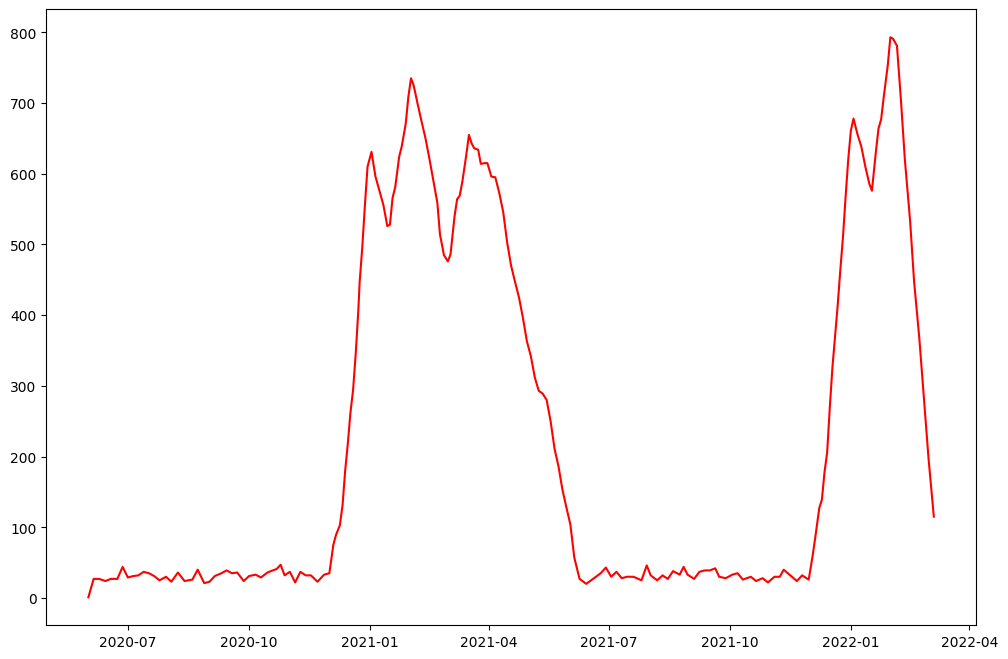

In [68]:
# Plot
import datetime as dt

# Select a subset of data, which is a divisor of the total number of unique strings.
fig, ax = plt.subplots()
ax.plot([dt.datetime.strptime(date, "%Y-%m-%d %H:%M:%S").date() for date in unique_timestamps_string[::243]], num_running_cases[::243], 'r')
fig.set_figwidth(12)
fig.set_figheight(8)


### b) Discovery and Conformance Checking (9pts)

#### **b(i)** 
Mine a Petri net using Inductive Miner and display it.

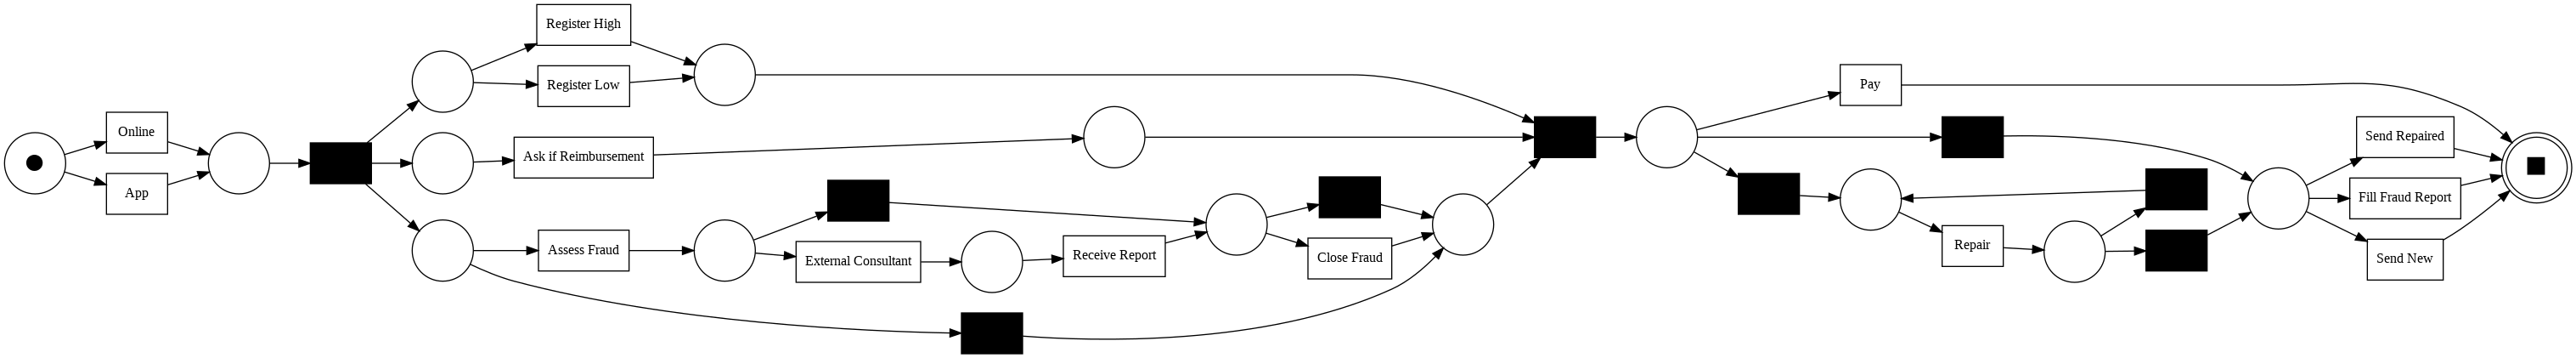

In [69]:
net, im, fm = pm4py.discover_petri_net_inductive(log)

# Visualise Petri Net
pm4py.view_petri_net(net, im, fm, format='png') 

#### **b(ii)** 
Compute the fitness of the discovered Petri net using token-based replay.

*Hint: PM4Py can directly (using the top-level API) compute the number of missing, remaining, consumed, and produced tokens. Based on these, you can, for example, compute the token-based replay fitness.*

In [70]:
def calculation_fitness(fitness_log):
  consumed_tokens = 0
  produced_tokens = 0
  missing_tokens = 0
  remaining_tokens = 0

  for trace in fitness_log:
      consumed_tokens += trace['consumed_tokens'] 
      produced_tokens += trace['produced_tokens']
      missing_tokens += trace['missing_tokens']
      remaining_tokens += trace['remaining_tokens']

  return 1/2 * (1- missing_tokens/consumed_tokens) + 1/2 * (1 - remaining_tokens/produced_tokens)


fitness_log = calculation_fitness(token_based_replay.apply(log, net, im, fm))

print(f'Fitness: {fitness_log}')

replaying log with TBR, completed variants ::   0%|          | 0/266 [00:00<?, ?it/s]

Fitness: 1.0


#### **b(iii)** 
Filter the log to contain only traces where *Register Low* occurs. How many traces does the resulting log `log_low` contain?


In [71]:
log_low = pm4py.filter_event_attribute_values(log, "concept:name",['Register Low'], level="case", retain=True)

print(f'Number of traces of log_low: {len(log_low)}')

Number of traces of log_low: 7021


/opt/conda/lib/python3.9/site-packages/packaging/version.py:111: DeprecationWarning:

Creating a LegacyVersion has been deprecated and will be removed in the next major release

/opt/conda/lib/python3.9/site-packages/packaging/version.py:111: DeprecationWarning:

Creating a LegacyVersion has been deprecated and will be removed in the next major release

/opt/conda/lib/python3.9/site-packages/packaging/version.py:111: DeprecationWarning:

Creating a LegacyVersion has been deprecated and will be removed in the next major release



#### **b(iv)** 
Discover a Petri net for `log_low` and compute its fitness. How does this model differ from the model you discovered in *b(i)*? 

Suppose each of your produced process models is considered a 2-class classifier: provided a trace, it returns "Yes" if and only if the trace can be replayed by the model. Based on this perspective, how would the two process models compare in terms of precision?

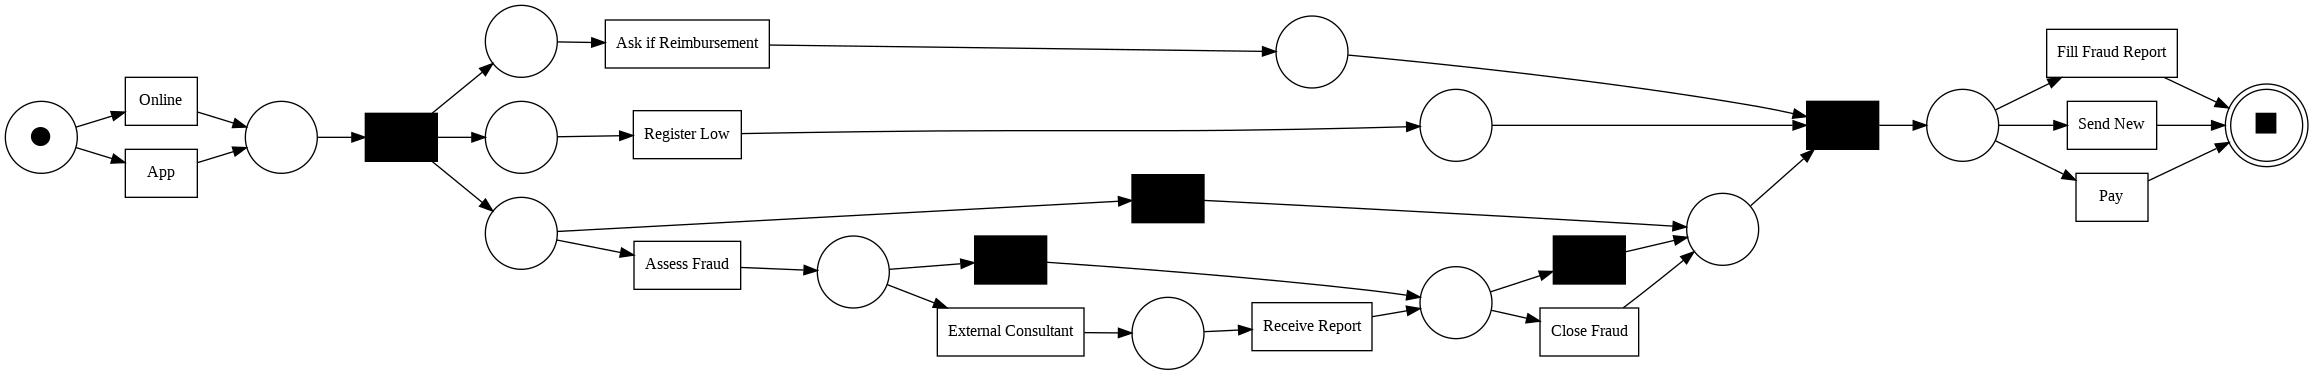

replaying log with TBR, completed variants ::   0%|          | 0/94 [00:00<?, ?it/s]

Fitness: 1.0


In [72]:
net2, im2, fm2 = pm4py.discover_petri_net_inductive(log_low)

# Visualise Petri Net
pm4py.view_petri_net(net2, im2, fm2, format='png') 

fitness_log_low = calculation_fitness(token_based_replay.apply(log_low, net2, im2, fm2))

print(f'Fitness: {fitness_log_low}')


**Your answer:** *(Briefly describe the difference between the two models here. About two sentences can be enough.*)

*The second model no longer has the Register High transition in the petri net. If we only consider traces with Register Low, then other transitions such as Repair and Send Repair no longer occur. This simplifies the number of transitions carried out at the later stages of process model. So that once the place before the final marking is reached, then it can either Pay, Fill Fraud Report or Send New.*

*All other transitions remain the same.*

**Your answer**: *(Relate your observations to precision here.)*

*The fitness of both models is 1. Meaning that both accurately portray the log of events fed into it. If the correct event log is fed into both (i.e. no traces containing Register High are fed to the second model), the 2-class classifier will always return Yes for both models.*

*So both models accurately portray the corresponding event log*

*If instead, we feed unknown data to the second model (i.e. traces with Register High), then the precision of the second model will decrease, as it will not be able to replay unknown transitions. The first model will always have 100% precision, as it can replay any trace in the event log, whilst the second model only a subset of traces.* 

### Conformance Diagnostics De-jure Model
The process owner provides you a de-jure model (i.e., a model of the should-be process) and a slightly changed version of the so far considered event log. 

In this task, you will again apply conformance checking by means of token-based replay to provide diagnostics on deviations.

#### **b(v)** 
Load the Petri net *pn_conf.apnml*, the event log *log_conf.xes*, and provide the overall (i.e., model-based) token-based replay fitness score.



In [78]:
log_conf = log = pm4py.read_xes('log_conf.xes')
net_conf, im_conf, fm_conf = pm4py.read.read_pnml('pn_conf.apnml')

fitness_log_conf = calculation_fitness(token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf))

display(fitness_log_conf)

parsing log, completed traces ::   0%|          | 0/10000 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/122 [00:00<?, ?it/s]

0.9892890758104679

#### **b(vi)** 
To provide additional diagnostics on the deviations, compute the missing, consumed, produced and remaining number of tokens for **each place**. 
To do so, use the following *pm4py* code:
    
    from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
	tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model =
    token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

After running this line for log `log_conf`, Petri net `net_conf` with initial marking `im_conf` and final marking `fm_conf`, the variable `place_fitness` will contain the token counts for each place and trace. Therefore, you will only need aggregate over the traces.
Print a table of the token counts per place. 


In [79]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model = token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

replaying log with TBR, completed variants ::   0%|          | 0/9999 [00:00<?, ?it/s]

In [80]:
def token_counts_place(place):
  consumed_tokens = 0
  produced_tokens = 0
  missing_tokens = 0
  remaining_tokens = 0

  consumed_tokens = place['c'] 
  produced_tokens = place['p']
  missing_tokens = place['m']
  remaining_tokens = place['r']

  return [consumed_tokens, produced_tokens, missing_tokens, remaining_tokens]

table_token_summary =[]
for place in place_fitness:
  tokens_summary = token_counts_place(place_fitness[place])
  tokens_summary.insert(0, place)
  table_token_summary.append(tokens_summary)

df_token_summary = pd.DataFrame(table_token_summary, columns = ['Place', 'Consumed Tokens', 'Produced Tokens', 'Missing Tokens', 'Remaining Tokens']) 

# Display table
display(df_token_summary)


Place  Consumed Tokens  Produced Tokens  Missing Tokens  Remaining Tokens
0     n1             9999             9999             899               899
1     n5             9999             9999               0                 0
2     n7             9999             9999               0                 0
3     n8             9999             9999               0                 0
4    n10             9999             9999               0                 0
5    n11             9999             9999               0                 0
6     n3               99               99               0                 0
7     n4             1917             1917               0                 0
8     n2             9999             9999               0                 0
9     n6             9999             9999               0                 0
10    n9             1917             1917               0                 0

#### **b(vii)** 
Consider the token counts per place and a few unfitting traces, which deviation(s) do you observe? Describe the deviation and briefly explain how it can be related to the token counts of the individual places. For example, activity *xy* is often missing resulting in a high number of missing tokens in place *p*.  


{(n14, 'External Consultant')->n3, n1->(n12, 'Ask if Reimbursement'), n10->(n16, 'Finalize'), n6->(n20, 'App'), n11->(n16, 'Finalize'), (n19, 'Register Low')->n1, n4->(n17, 'Close Fraud'), n2->(n13, 'Assess Fraud'), n7->(n22, 'Register High'), n7->(n19, 'Register Low'), (n13, 'Assess Fraud')->n9, (n18, 'Online')->n8, (n21, None)->n2, (n25, None)->n4, n6->(n18, 'Online'), (n22, 'Register High')->n1, n2->(n23, None), (n15, 'Receive Report')->n4, n9->(n25, None), n3->(n15, 'Receive Report'), n9->(n14, 'External Consultant'), (n20, 'App')->n8, (n12, 'Ask if Reimbursement')->n11, (n24, None)->n10, (n23, None)->n10, (n21, None)->n7, (n16, 'Finalize')->n5, n8->(n21, None), n4->(n24, None), (n17, 'Close Fraud')->n10}


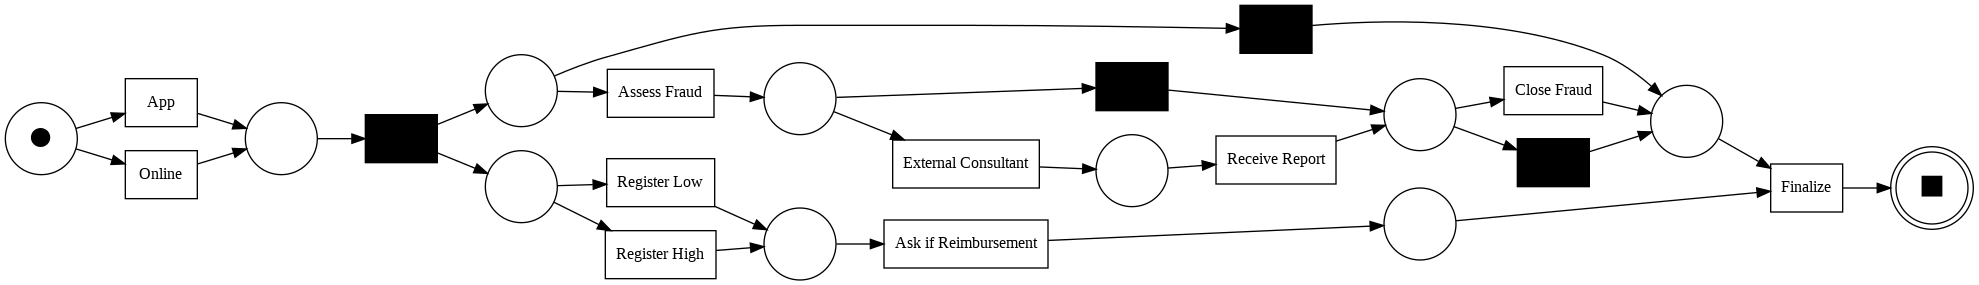

"\nfor place in place_fitness:\n  print(len(place_fitness[place]['underfed_traces']))\n  for underfed_trace in place_fitness[place]['underfed_traces']:\n    for element in underfed_trace:\n      print(element['concept:name'])\n    print('__________')\n  break\n"

In [81]:
# It can be seen that the only place at which deviations occur is in n1.

# Visually inspect arcs in the model in combination with petri net diagram to understand
# place where the unfitting traces are occuring
print(net_conf.arcs)
pm4py.view_petri_net(net_conf, im_conf, fm_conf, format='png') 

# From this it can be seen that n1 corresponds to the place where "Register High" and "Register Low" converge.
# Now we want to inspect the underfed ttraces corresponding to n1
"""
for place in place_fitness:
  print(len(place_fitness[place]['underfed_traces']))
  for underfed_trace in place_fitness[place]['underfed_traces']:
    for element in underfed_trace:
      print(element['concept:name'])
    print('__________')
  break
"""

**Your answer:** *(Describe the deviation(s). One sentence can already be enough.)*

*The Petri Net in this model differs with respect to the first derived model. In here the "Ask if Reimbursement" is triggered sequentially after the place resulting from either the Register High or Register Low transitions. In the first model this transition was it's  own course of action, parallel to the Register High/Low* 


**Your answer:** (*Relate the deviation(s) to the token counts of the individual places. Roughly five sentences can be enough for a precise description.*)
*As a result of the variation in the position of the Ask if Reimbursement, the number of missing and remaining tokens found in the place that triggers this action is very high.*

*An analysis was carried out, printing all of the events of the traces causing these missing tokens (this code has been commented for clarity). From a visual inspection, it can be seen that Ask if Reimbursement occurs sequentially after Online/App and parallel to Assess Fraud and Register High/Low, i.e. Ask if Reimbursement occurs before Register High/Low.*

*The fitness of this model, is also lower than for the first two models, although still very high as it is approximately 1.*

### c) Analyzing Fraud (4pts)

#### **c(i)** 
Filter the event log so that it only contains traces where a fraud report is filled (occurrence of `Fill Fraud Report`). For theses traces, create a bar plot showing the number of products of a certain brand involved in the fraud. Describe the resulting plot.

*Hint: Each case is associated with precisely one brand.*


Text(0.5, 0, 'Brand name')

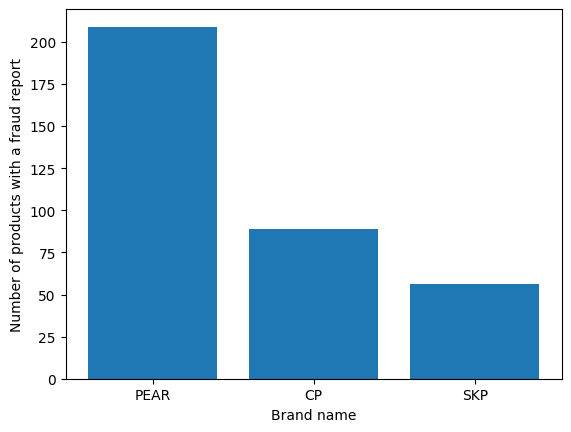

In [96]:
tracefilter_report_fraud = pm4py.filter_event_attribute_values(log, "Activity",["Fill Fraud Report"], level="case", retain=True)

brand = []
number_products_fraud = []
tracefilter_report_fraud = pm4py.convert_to_dataframe(tracefilter_report_fraud)

for trace in tracefilter_report_fraud['Brand'].unique():
  brand.append(trace)
  subset = tracefilter_report_fraud.loc[tracefilter_report_fraud['Brand']==trace]
  number_products_fraud.append( subset['CaseId'].nunique())


# Plot bar graph
plt.figure()
plt.bar(brand, number_products_fraud)
plt.ylabel('Number of products with a fraud report')
plt.xlabel('Brand name')

**Your answer:** (*Describe the plot in two to three sentences.*)

*The brand with the highest number of products (greater than 200) where a fraud report was filled is PEAR. This was followed by CP and finally by SKP.*

#### **c(ii)**  
The plot shows differences between brands. Discuss the result. Consider what you learned in Lecture 11 (association rules). Try to provide additional analysis results to underpin your discussion.

*Hint: A very short additional analysis (i.e., a few lines of code) might already be sufficient.*


In [97]:
# We want to calculate the totallity of cases associated to the three brands

for count, brand in enumerate(tracefilter_report_fraud['Brand'].unique()):
  total_number_cases = df1[df1["Brand"] == brand]
  n_unique_cases = total_number_cases["CaseId"].nunique()
  print(f"Brand {brand} has {n_unique_cases} total products. \n This means a {round(number_products_fraud[count]/n_unique_cases * 100, 2)}% are fraudulent")
# We want to 

Brand PEAR has 5911 total products. 
 This means a 3.54% are fraudulent
Brand CP has 2142 total products. 
 This means a 4.15% are fraudulent
Brand SKP has 1947 total products. 
 This means a 2.88% are fraudulent


**Your answer:** *(Relate your results to Lecture 11, approximately one short paragraph)*

*For each of the brands, we want to see the probability that a trace contains a Fraud Report being filled with respect to all of the processes associated with that brand. We can see that for all brands, the cases where Fraud was reported is quite small <5%.*
*Pearl had the highest number of reports being filled. JHowever, it also has the highest number of traces associated with it. When we take into account the probability, instead of the count,the brand SKP has a higher pecentage of filling a Fraud Report*


## Question 6 - Simpson's Paradox (3 pts)

### Sex Bias in Berkeley Graduate Admissions?

In the Fall of 1973, the University of California at Berkeley released data about their graduate class. The data showed the major the applicant applied to, their self-reported gender (Male or Female), and whether or not they were accepted or rejected. The acceptance rates between men and women were different. This caused immediate concern in the public as people thought that Berkeley was biased against women.

The "Berkeley Dataset" contains all 12,763 applicants to UC-Berkeley's graduate programs in Fall 1973. This dataset was published by UC-Berkeley researchers in an analysis to understand the possible gender bias in admissions.

Dataset Variables:

Year : number ➜ The application year (this value is always 1973)

Major : string ➜: An anonymized major code (either A, B, C, D, E, F, or Other). The specific majors are unknown except that A-F are the six majors with the most applicants in Fall 1973

Gender : string ➜ Applicant self-reported gender (either M or F)

Admission: string ➜ Admission decision (either Rejected or Accepted)

**a)**
Upload the data from the `berkeley.csv` file and load it into a dataframe named `data`. Display the first few lines from the dataframe.

In [98]:
data = pd.read_csv("berkeley.csv", index_col=0)
display(data.head(5))

Major Gender Admission
Year                        
1973      C      F  Rejected
1973      B      M  Accepted
1973  Other      F  Accepted
1973  Other      M  Accepted
1973  Other      M  Rejected

**b)** Remove the "Year" column as it does not contain any information in this dataset (all years are 1973.)

In [99]:
data.reset_index(drop=True, inplace=True)

**c)** For each of the values of column "Gender", compute the admission rate and compare them against each other.

In [100]:
for i in data['Gender'].unique():
  ad_rate = len(data[(data['Gender']==i) & (data['Admission']=='Accepted')]) / len(data[(data['Gender']==i)]) *100
  print('Admission rate (' + str(i) + '): ' + str(round(ad_rate,2)) + '%')

del(ad_rate)

Admission rate (F): 34.58%
Admission rate (M): 44.28%


**Your answer:**

The admission rate is almost 10\% higher from men than for women.

**d)** For each value combination of the "Gender" and "Major" columns, compute the admission rate. Compare the admission rate of women against the admission rate of men for each of the majors.

In [101]:
print('Admission rate (Mayor,Gender): --.--%')
for j in data['Major'].unique():
  for i in data['Gender'].unique():
    gen_maj = (data['Gender']==i) & (data['Major'] == j)
    ac = (data['Admission']=='Accepted')
    ad_rate = len(data[ac & gen_maj]) / len(data[gen_maj]) *100
    print('Admission rate (' + str(j) + ', ' + str(i) + '): ' + str(round(ad_rate,2)) + '%')

del(ac,ad_rate,data,gen_maj,i,j)

Admission rate (Mayor,Gender): --.--%
Admission rate (C, F): 33.9%
Admission rate (C, M): 36.92%
Admission rate (B, F): 68.0%
Admission rate (B, M): 63.04%
Admission rate (Other, F): 37.69%
Admission rate (Other, M): 40.95%
Admission rate (F, F): 7.33%
Admission rate (F, M): 5.9%
Admission rate (A, F): 82.41%
Admission rate (A, M): 72.5%
Admission rate (D, F): 34.93%
Admission rate (D, M): 33.09%
Admission rate (E, F): 23.92%
Admission rate (E, M): 27.75%


**Your answer:** 
The admission rate is higher for females in 4 out of the 7 majors studied, while for the remaining 3 is larger for males.

**e)** Can you confirm there is a sex bias in the admission rates of the students?

**Your answer:**

With the data considered in this question is does not seem like there is a sex bias regarding the admission in Berkeley. Nevertheless, we think that more features should be considered to make this an statement.

## Question 7: Big Data (15pts)

In [102]:
import pandas as pd

You are a data scientist at NASA, an agency for civil space programs, and with your team you develop and maintain the software of the NASA Crew Exploration Vehicle (CEV).  Your task is to analyze the performance of the software, and as a first exploratory step, you would like to **compute the mean execution times** of function calls within that software. Since the running vehicle will generate a high throughput of observable events in a stream, you decide to set up a MapReduce pipeline in Hadoop. 

The file **nasa-cev-software-tests.tsv** records timestamped events of the vehicle's software tests. The log contains the columns *Case*, *Activity* and *Timestamp*, denoting the case ID, the activity key (method call) and timestamp of the event record in nanoseconds, respectively. Furthermore, the log contains the columns *Lifecycle Transition* and *Execution ID*. The lifecycle transition takes either of the values *start* and *complete*, stating whether the corresponding activity (method call) in that row is being started or completed at the specified timestamp. The execution ID relates each event to a concrete method call, i.e., for each execution ID, there are exactly two entries (namely a *start* and a *complete* event) in the log.

### a) Plan the Maths (2pt):

The mean $\mu_n$ over numerical values $v_1,...,v_n$ is well-known to be computed as $\mu_n = \frac{1}{n}\sum_{i=1}^{n} v_i$.\
One may also use the alternative recursive formalization $\mu_{n+m} = \frac{n\cdot\mu_{n} + m\cdot\mu_{m}}{n+m}$. \
What is the advantage of using the alternative formalization when you think of handling streaming data or distributed data? Briefly explain.


**Your answer:** We think the most advantageous option when handling streaming data is the second one, because a recursive formalization allows for the computation to be done on the data while it's being received. Meanwhile, when considering distibuted data, we can access almost simultaneously the different values and in this case the sumation formula suits best.

### b) Set up MapReduce (10pts)

Realize the computation of the mean execution times of activities as a MapReduce job. 
You need to implement this a cascaded MapReduced job. This means that the output of the first job will serve as the input of the second job. In the first job, derive the execution times of each activity execution, i.e. the time difference between the *complete* and the *start* lifecycle transition of each activity execution. In the second step, aggregate this timing information to compute the mean.

#### **b(i)** 
Specify the *function signatures* of the map functions and the reduce functions that you are going to use.\
I.e., find concrete sets to substitute $K_1, V_1, ... $ in the general signatures for map and reduce functions \

$ map:  K_1 \times V_1 \rightarrow (K_2 \times V_2)^* $\
$ reduce: K_2 \times (V_2)^* \rightarrow (V_3)^*$ (or a singleton $V_3$) 

*Hint: You may introduce symbols to denote sets, e.g. $Act$ for the set of activities.\
You may also first implement the solution (b(ii)) to get an idea about the underlying signatures.\
Mind that you need two map and two reduce functions.*

**Your answer:**

$map_1: (Case, Activity, Timestamp, Lifecycle Transition, Execution ID) \times (Act) \rightarrow (Execution ID, (Timestamp, Lifecycle Transition))^*$

$reduce_1: Execution ID \times ((Timestamp, Lifecycle Transition))^* \rightarrow (Execution ID, Execution Time)^*$

$map_2: (Execution ID, Execution Time) \times (Act) \rightarrow (Activity, (Execution Time))^*$

$reduce_2: Activity \times ((Execution Time))^* \rightarrow (Mean Execution Time)$

#### **b(ii)**: 
Specify map functions and reduce functions to compute the mean execution time per activity as python scripts.

In [103]:
# your code (nasa_mapper1.py)

def nasa_mapper1(key, value, act):
    case, activity, timestamp, lifecycle_transition, execution_id = key
    if activity in act:
        return execution_id, (timestamp, lifecycle_transition)

In [104]:
# your code (nasa_reducer1.py)

def nasa_reducer1(key, values):
    start_time, end_time = None, None
    for timestamp, lifecycle_transition in values:
        if lifecycle_transition == "start":
            start_time = timestamp
        elif lifecycle_transition == "complete":
            end_time = timestamp
    if start_time and end_time:
        execution_time = end_time - start_time
        return key, execution_time

In [105]:
# your code (nasa_mapper2.py)

def nasa_mapper2(key, value, act):
    execution_id, execution_time = key, value
    activity = None
    for act_i in act:
        if execution_id in act_i[1]:
            activity = act_i[0]
    if activity:
        return activity, execution_time

In [106]:
# your code (nasa_reducer2.py)

def nasa_reducer2(key, values):
    n = len(values)
    mean_execution_time = sum(values) / n
    return mean_execution_time

### c) Run MapReduce (3pts)

In the following, please use one of your team members' matriculation number as an identifier.

#### **c(i) (Randomization)**: 
Before applying your functions from the previous step to the dataset, please insert the matriculation number and run the following lines to randomly filter out a few of the traces in the event log, and continue working with the filtered log. 


In [108]:
# your matriculation number here
matr_nb = 447498

# utility code (do not change)
import random
random.seed(matr_nb)

full_df = pd.read_csv("nasa-cev-software-tests.tsv", sep="\t")

case_ids = list(set(full_df["Case"].values))
case_ids.sort()
filtered_out_case_ids = random.sample(case_ids, 10)
filtered_case_ids = [case_id for case_id in case_ids if case_id not in filtered_out_case_ids]
randomized_df = full_df[full_df["Case"].isin(filtered_case_ids)]

randomized_df.to_csv("nasa-cev-software-tests-randomized-" + str(matr_nb) + ".tsv",
          columns=["Activity", "Timestamp", "Lifecycle Transition", "Execution ID"],
          sep="\t", index=False, header=False)

#### **c(ii)**:
Now, it is time to work with the Hadoop Distributed File System (HDFS). Follow the instructions below and show your results in each step (screenshots of the command line).

    1) Import the event log to your Docker engine (at /usr/local/hadoop/(your_matr_nb)-event-log/). You also need to import the python scripts, but only document the event log import here.
    2) Upload the files to the running HDFS (at /input/(your_matr_nb)-event-log/).
	3) Run Hadoop commands for the MapReduce computation.
    4) Show the final output (computed mean execution times).

In [109]:
from IPython.display import Image
# your code

# Image(filename='filename_screenshot_of_a1')

In [110]:
# your code
# Image(filename='filename_screenshot_of_a2')

In [111]:
# your code
# Image(filename='filename_screenshot_of_a3')

In [112]:
# your code
# Image(filename='filename_screenshot_of_a4')